<a href="https://colab.research.google.com/github/Tapomay1/Health-Insurence-Cross-Sell-Prediction/blob/main/Classification_Capstone_Cross_Sell_Prediction_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - **Health Insurance Cross Sell Prediction**

#####**Project Type** - Classification
#####**Contribution** - Team
##### **Team Member - 1** - Tapomay Sahoo
##### **Team Member - 2** - Shivam Tiwari

#**Project Summary**

Hello, all. We have worked on the Health Insurance Cross Sell Prediction dataset of an insurance company. The dataset contains information of various customers like whether they have had a vehicle insurance, whether they have a driving license, what is their annual premium amount and many more relevant things. 

It also contains informations on the region the customer belongs to and the method used to close the vehicle insurance sale.

We have tried to work on the data and get three things out of it:

a. We have tried to generate insights through the EDA process

b. We have tried to analyse the kinds of relations between a sale being closed and the customer data

c. And most importantly, we have tried to build a machine learning predictive model that helps us predict the customers who may lean towards buying our vehicle insurance in future.

We hope that you like the project and we would like to listen to your thoughts on it. You can reach us at  er.tapomay@gmail.com and shivchirag1997@gmail.com .

#**Github Link**

The official github link of the project is https://github.com/Tapomay1/Health-Insurence-Cross-Sell-Prediction

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Our client is an insurance company who wish to sell their health insurance customers vehicle insurance. And they have provided us with the dataset from their first attempt. We are supposed to find insights from their first attempts and then build a predictive model to predict which customers in future are more likely to buy their vehicle insurance.

# ***Let's Begin !***

## ***1. Know Your Data***

###Import Libraries

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
sns.set()
%matplotlib inline

import time
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.float_format = '{:.2f}'.format

from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

!pip install shap
import shap 
import graphviz
!pip install lime
from lime.lime_tabular import LimeTabularExplainer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=79bc05ea5753c5cb25b72f78121c00d17d4ce711708c1de205d67ead347ce46e
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


###Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module_04/Capstone_pro_2/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
# Generating a copy
df = dataset.copy()

### Dataset Overview


In [ ]:
# First view of the dataset
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1        28.00                   0   
1   2    Male   76                1         3.00                   0   
2   3    Male   47                1        28.00                   0   
3   4    Male   21                1        11.00                   1   
4   5  Female   29                1        41.00                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes        40454.00                 26.00      217   
1    1-2 Year             No        33536.00                 26.00      183   
2   > 2 Years            Yes        38294.00                 26.00       27   
3    < 1 Year             No        28619.00                152.00      203   
4    < 1 Year             No        27496.00                152.00       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [ ]:
# No. of rows and columns
df.shape

(381109, 12)

In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Duplicates and Null Values


In [ ]:
# Duplicates in the dataset
len(df[df.duplicated()])

0

In [ ]:
# Missing Values
print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


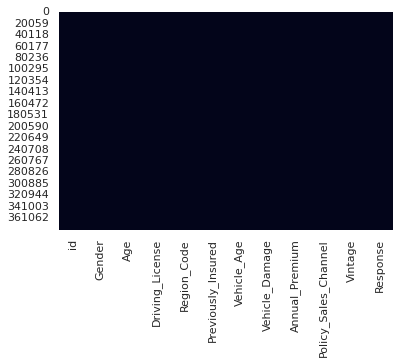

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False);

### What do we know now about the dataset?

The dataset has 381109 rows and 12 columns. It has no duplicated rows and zero null values.

Apart from the target variable, there are six other categorical variables and the rest are numeric (discrete and continuous).

## ***2. Understanding the variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

id  Gender       Age  Driving_License  Region_Code  \
count  381109.00  381109 381109.00        381109.00    381109.00   
unique       NaN       2       NaN              NaN          NaN   
top          NaN    Male       NaN              NaN          NaN   
freq         NaN  206089       NaN              NaN          NaN   
mean   190555.00     NaN     38.82             1.00        26.39   
std    110016.84     NaN     15.51             0.05        13.23   
min         1.00     NaN     20.00             0.00         0.00   
25%     95278.00     NaN     25.00             1.00        15.00   
50%    190555.00     NaN     36.00             1.00        28.00   
75%    285832.00     NaN     49.00             1.00        35.00   
max    381109.00     NaN     85.00             1.00        52.00   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
count            381109.00      381109         381109       381109.00   
unique                 NaN           3              2             NaN   
top                    NaN    1-2 Year            Yes             NaN   
freq                   NaN      200316         192413             NaN   
mean                  0.46         NaN            NaN        30564.39   
std                   0.50         NaN            NaN        17213.16   
min                   0.00         NaN            NaN         2630.00   
25%                   0.00         NaN            NaN        24405.00   
50%                   0.00         NaN            NaN        31669.00   
75%                   1.00         NaN            NaN        39400.00   
max                   1.00         NaN            NaN       540165.00   

        Policy_Sales_Channel   Vintage  Response  
count              381109.00 381109.00 381109.00  
unique                   NaN       NaN       NaN  
top                      NaN       NaN       NaN  
freq                     NaN       NaN       NaN  
mean                  112.03    154.35      0.12  
std                    54.20     83.67      0.33  
min                     1.00     10.00      0.00  
25%                    29.00     82.00      0.00  
50%                   133.00    154.00      0.00  
75%                   152.00    227.00      0.00  
max                   163.00    299.00      1.00

###Variables Description

**id :** Unique ID

**Gender :** Gender of the customer

**Age :** Age of the customer

**Driving_License :** Does the customer have a driving license?

**Region_Code :** Unique ID of the region of the customer

**Previously_Insured :** Did the customer previously have a vehicle insurance?

**Vehicle_Age :** Age of the customer's vehicle

**Vehicle_Damage :** Is the customer's vehicle damaged?

**Annual_Premium :** Amount customer pays as premium annually

**Policy_Sales_Channel :** Policy Sales Channel (Anonymised code)

**Vintage :** Number of days customer has been with the company

**Response :** Response (Target Variable)

### Checking number of uniques

In [ ]:
# Check unique values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  id is 381109
No. of unique values in  Gender is 2
No. of unique values in  Age is 66
No. of unique values in  Driving_License is 2
No. of unique values in  Region_Code is 53
No. of unique values in  Previously_Insured is 2
No. of unique values in  Vehicle_Age is 3
No. of unique values in  Vehicle_Damage is 2
No. of unique values in  Annual_Premium is 48838
No. of unique values in  Policy_Sales_Channel is 155
No. of unique values in  Vintage is 290
No. of unique values in  Response is 2


## ***3. Data Wrangling***

In [ ]:
# Dividing the datasets based on the final response
df_Response_Yes = df[df['Response']==1]
df_Response_No = df[df['Response']==0]

We dont think the dataset needs to be divided anymore or worked much upon for the EDA process. We are very happy with what we have and decided to divide the dataset only based on the final response of the customer.

## ***4. Understanding the relationships between variables using different kinds of visualisation techniques:***


####4.1 Understanding the distribution of the target variable:

In [ ]:
pie_data = df.Response.value_counts(normalize=True).reset_index()
pie_data

index  Response
0      0      0.88
1      1      0.12

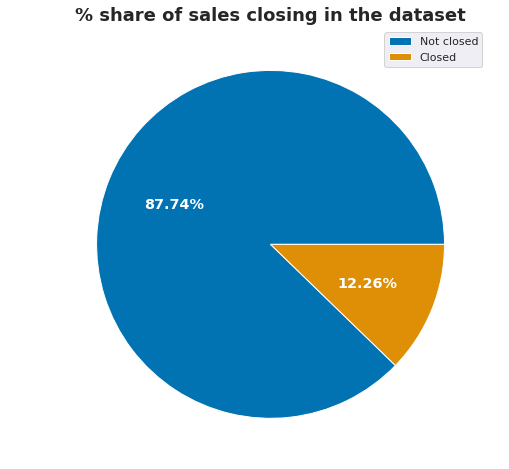

In [ ]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Response'],
        labels = ['Not closed', 'Closed'],
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of sales closing in the dataset", fontweight = "bold", fontsize = 18)
plt.show();

We have decided to use pie chart as it is pleasing and easy to understand.

Getting the sales done is not easy regardless of how much information one can get of the customer. And so, the distribution of sales closed and not closed would be very skewed in nature.

Only 12.26% of the sales were closed by the team.

####4.2 What is the distribution of customers' previous record of vehicle insurance?

In [ ]:
# Overall record of previous vehicle insurance
pie_data = df.Previously_Insured.value_counts(normalize=True).reset_index()
pie_data

index  Previously_Insured
0      0                0.54
1      1                0.46

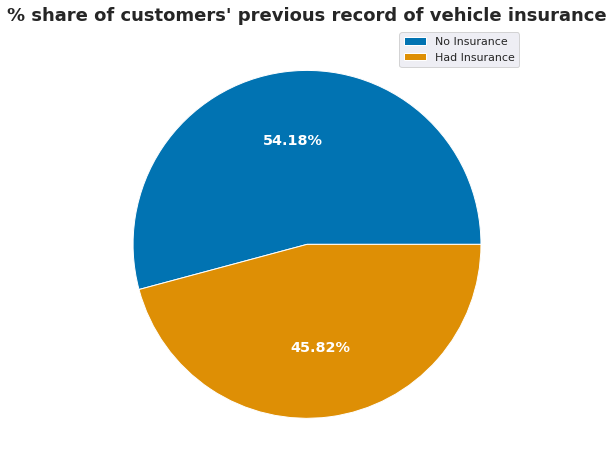

In [ ]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Previously_Insured'],
        labels = ['No Insurance', 'Had Insurance'],
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of customers' previous record of vehicle insurance", fontweight = "bold", fontsize = 18)
plt.show();

From the data that we have of our health insurance customers, we understand that 54.18% of them do not have any record of vehicle insurance in the previous years. This certainly is a big market to try and penetrate and so campaigns that helps a user understand the benefits of having a vehicle insurance must be created.

And for those who have had vehicle insurances, it should be studied what was for them an ideal vehicle insurance. Understanding what a customer needs is as important as making awareness campaigns of your services.

In [ ]:
# Record of previous vehicle insurances for customers who converted
pie_data = df_Response_Yes.Previously_Insured.value_counts().reset_index()
pie_data

index  Previously_Insured
0      0               46552
1      1                 158

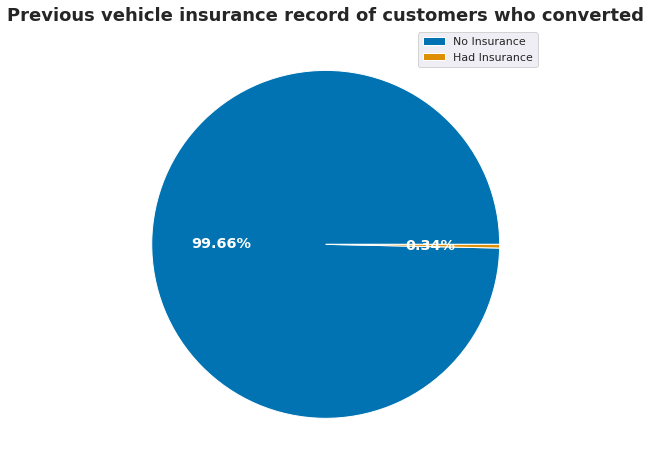

In [ ]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Previously_Insured'],
        labels = ['No Insurance', 'Had Insurance'],
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"})
plt.legend()
# Giving our chart a suitable title
plt.title('Previous vehicle insurance record of customers who converted', fontweight = "bold", fontsize = 18)
plt.show();

Almost all the customers (99.66%) who converted, converted from the ones who never really had a vehicle insurance before.

In [ ]:
# Record of previous vehicle insurances for customers who were not converted
pie_data = df_Response_No.Previously_Insured.value_counts().reset_index()
pie_data

index  Previously_Insured
0      1              174470
1      0              159929

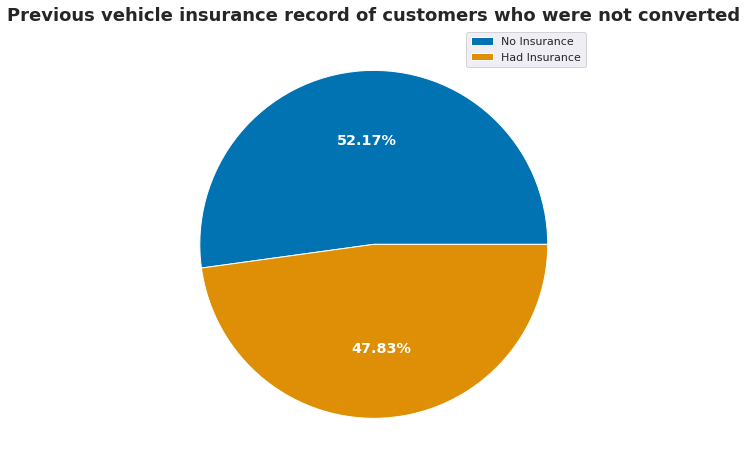

In [ ]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Previously_Insured'],
        labels = ['No Insurance', 'Had Insurance'],
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"})
plt.legend()
# Giving our chart a suitable title
plt.title('Previous vehicle insurance record of customers who were not converted', fontweight = "bold", fontsize = 18)
plt.show();

Given how our main customer base is the one who never had a vehicle insurance, 52.17% not accepting our intial offers makes the market with still a lot more opportunities. 

####4.3 What is the gender distribution of our customers and of those who converted?

In [ ]:
# Record of previous vehicle insurances for customers who converted
pie_data = df.Gender.value_counts().reset_index()
pie_data

index  Gender
0    Male  206089
1  Female  175020

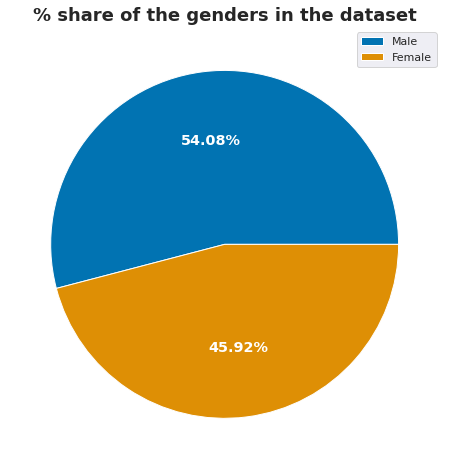

In [ ]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Gender'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of the genders in the dataset", fontweight = "bold", fontsize = 18)
plt.show();

Our health insurance customers' dataset has 54.08% males and 45.92% females.

In [ ]:
# Gender distribution for customers who converted
pie_data = df_Response_Yes.Gender.value_counts().reset_index()
pie_data

index  Gender
0    Male   28525
1  Female   18185

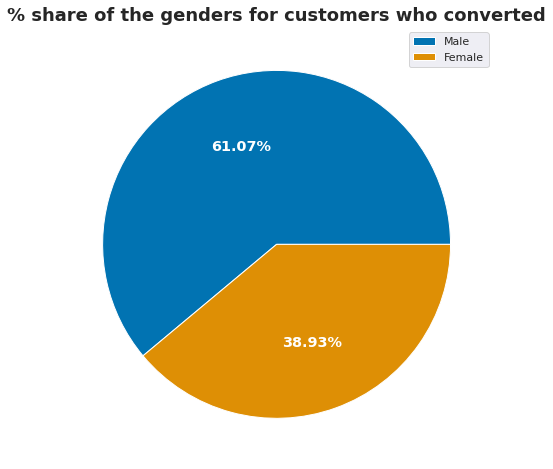

In [ ]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Gender'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of the genders for customers who converted", fontweight = "bold", fontsize = 18)
plt.show();

We have not been as popular amongst our female health insurance customers when it comes to swaying them into buying our vehicle insurances as well as we would have liked to. Only 38.93% females have converted and 61.07% males have converted of the ones who converted.

In [ ]:
# Gender distribution for customers who were not converted
pie_data = df_Response_No.Gender.value_counts().reset_index()
pie_data

index  Gender
0    Male  177564
1  Female  156835

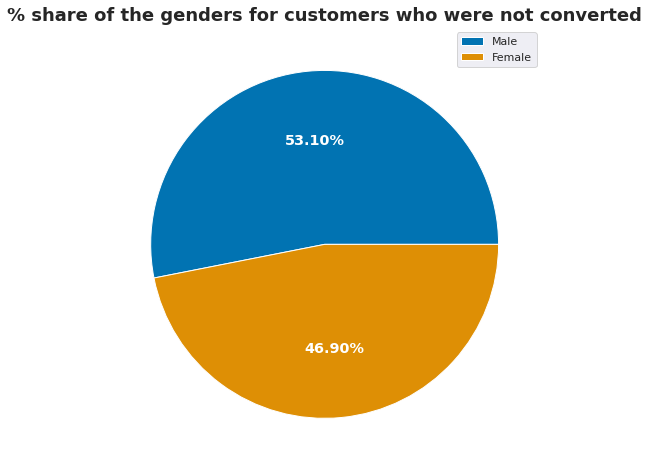

In [ ]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Gender'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of the genders for customers who were not converted", fontweight = "bold", fontsize = 18)
plt.show();

Of the ones who did not convert to buy our vehicle insurances, the numbers are somewhat more consistent with what they are for the overall dataset. 53.1% males and 46.9% females didn't convert.

####4.4 What is the distribution of age of the customers?

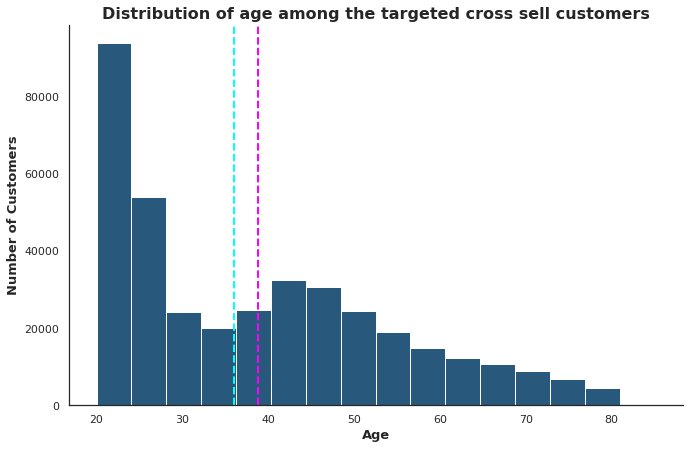

In [ ]:
# Plotting a histogram
sns.set_style("white")
plt.figure(figsize = (11,7))
plt.hist(df.Age,
         bins = 16,
         color = "#28587B")
plt.axvline(df.Age.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df.Age.median(), color='cyan', linestyle='dashed', linewidth=2)   
plt.title("Distribution of age among the targeted cross sell customers", fontsize = 16, weight = "bold")
plt.xlabel("Age", fontsize = 13, fontweight = 'bold')
plt.ylabel("Number of Customers", fontsize = 13, fontweight = 'bold')
sns.despine()
plt.show();

In [ ]:
print('Mean = ',df.Age.mean())
print('Median = ',df.Age.median())

Mean =  38.822583565331705
Median =  36.0


The distribution of the age of the customers is positively skewed. Its mean is somewhat close to 38.82 whereas the median is 36.


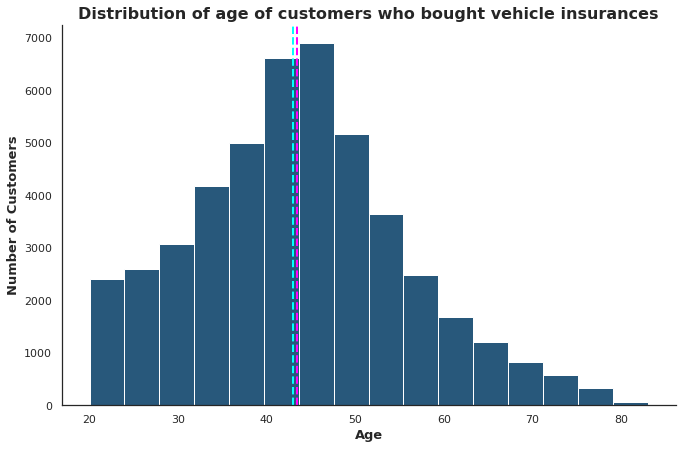

In [ ]:
# Plotting a histogram
sns.set_style("white")
plt.figure(figsize = (11,7))
plt.hist(df_Response_Yes.Age,
         bins = 16,
         color = "#28587B")
plt.axvline(df_Response_Yes.Age.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_Response_Yes.Age.median(), color='cyan', linestyle='dashed', linewidth=2)   
plt.title("Distribution of age of customers who bought vehicle insurances", fontsize = 16, weight = "bold")
plt.xlabel("Age", fontsize = 13, fontweight = 'bold')
plt.ylabel("Number of Customers", fontsize = 13, fontweight = 'bold')
sns.despine()
plt.show();

In [ ]:
print('Mean = ', df_Response_Yes.Age.mean())
print('Median = ', df_Response_Yes.Age.median())

Mean =  43.435559837293944
Median =  43.0


The distribution of age for the customers who responded positively is a more like Guassian distribution with mean and median both almost equal. Mean is 43.43 whereas median is 43. 

The middle-aged customers showed more interest in our vehicle insurance.

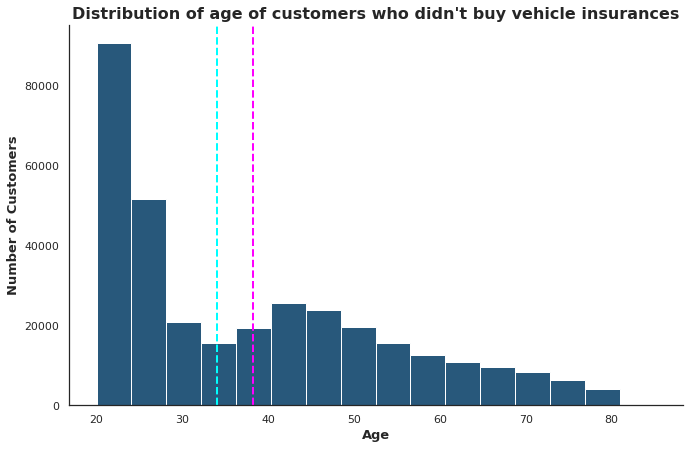

In [ ]:
# Plotting a histogram
sns.set_style("white")
plt.figure(figsize = (11,7))
plt.hist(df_Response_No.Age,
         bins = 16,
         color = "#28587B")
plt.axvline(df_Response_No.Age.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_Response_No.Age.median(), color='cyan', linestyle='dashed', linewidth=2)   
plt.title("Distribution of age of customers who didn't buy vehicle insurances", fontsize = 16, weight = "bold")
plt.xlabel("Age", fontsize = 13, fontweight = 'bold')
plt.ylabel("Number of Customers", fontsize = 13, fontweight = 'bold')
sns.despine()
plt.show();

In [ ]:
print('Mean = ', df_Response_No.Age.mean())
print('Median = ', df_Response_No.Age.median())

Mean =  38.17822720761725
Median =  34.0


Since the negative responses are high in number, the distribution of age in the negative responses resemble the distribution of age in the overall dataset.

The mean here is 38.17 and the median is 34.

####4.5 What is the distribution of customers with drivers license?

In [ ]:
# Record of previous vehicle insurances for customers who converted
pie_data = df.Driving_License.value_counts().reset_index()
pie_data

index  Driving_License
0      1           380297
1      0              812

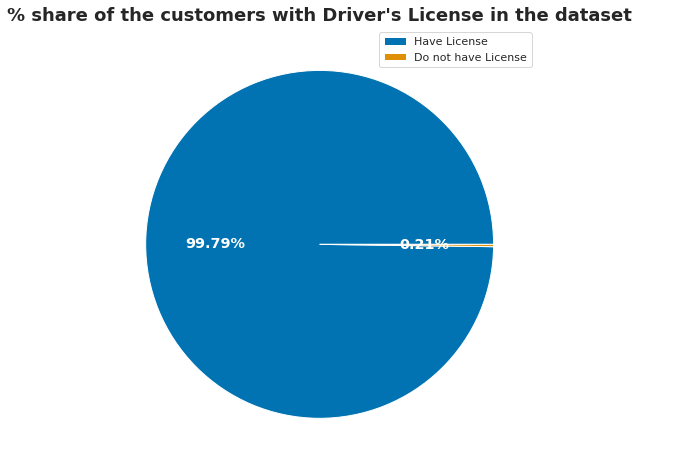

In [ ]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Driving_License'],
        labels = ['Have License', 'Do not have License'],
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of the customers with Driver's License in the dataset", fontweight = "bold", fontsize = 18)
plt.show();

Almost everyone targeted holds a vehicle insurance, as expected. Only 0.21% of the customers targeted don't have a driving license.

####4.6 What is the distribution of the customers based on region code?

In [ ]:
temp = df.groupby('Region_Code').agg({'Region_Code':'count'}).rename(columns={'Region_Code':'Total in region'}).reset_index() #Overall count for each region codes
temp.head()

Region_Code  Total in region
0         0.00             2021
1         1.00             1008
2         2.00             4038
3         3.00             9251
4         4.00             1801

In [ ]:
temp1 = df_Response_Yes.groupby('Region_Code').agg({'Region_Code':'count'}).rename(columns = {'Region_Code':'Total Yes'}).reset_index() #Count of Yes in each region
temp1.head()

Region_Code  Total Yes
0         0.00        174
1         1.00        109
2         2.00        287
3         3.00       1181
4         4.00        285

In [ ]:
temp2 = df_Response_No.groupby('Region_Code').agg({'Region_Code':'count'}).rename(columns = {'Region_Code':'Total No'}).reset_index() #Count of No in each region
temp2.head()

Region_Code  Total No
0         0.00      1847
1         1.00       899
2         2.00      3751
3         3.00      8070
4         4.00      1516

In [ ]:
bar_data = pd.merge(left = temp, right = temp1, on = 'Region_Code') #Merging the first two dataframes
bar_data = pd.merge(left = bar_data, right = temp2, on = 'Region_Code') #Merging the merged dataframe with the last dataframe
bar_data = bar_data.sort_values(by = 'Total in region', ascending = False)
bar_data.head()

Region_Code  Total in region  Total Yes  Total No
28        28.00           106415      19917     86498
8          8.00            33877       3257     30620
46        46.00            19749       2032     17717
41        41.00            18263       2224     16039
15        15.00            13308        958     12350

In [ ]:
bar_data = bar_data.iloc[:10,:] #Selecting the data for top 10 regions
bar_data

Region_Code  Total in region  Total Yes  Total No
28        28.00           106415      19917     86498
8          8.00            33877       3257     30620
46        46.00            19749       2032     17717
41        41.00            18263       2224     16039
15        15.00            13308        958     12350
30        30.00            12191        900     11291
29        29.00            11065       1365      9700
50        50.00            10243        642      9601
3          3.00             9251       1181      8070
11        11.00             9232       1041      8191

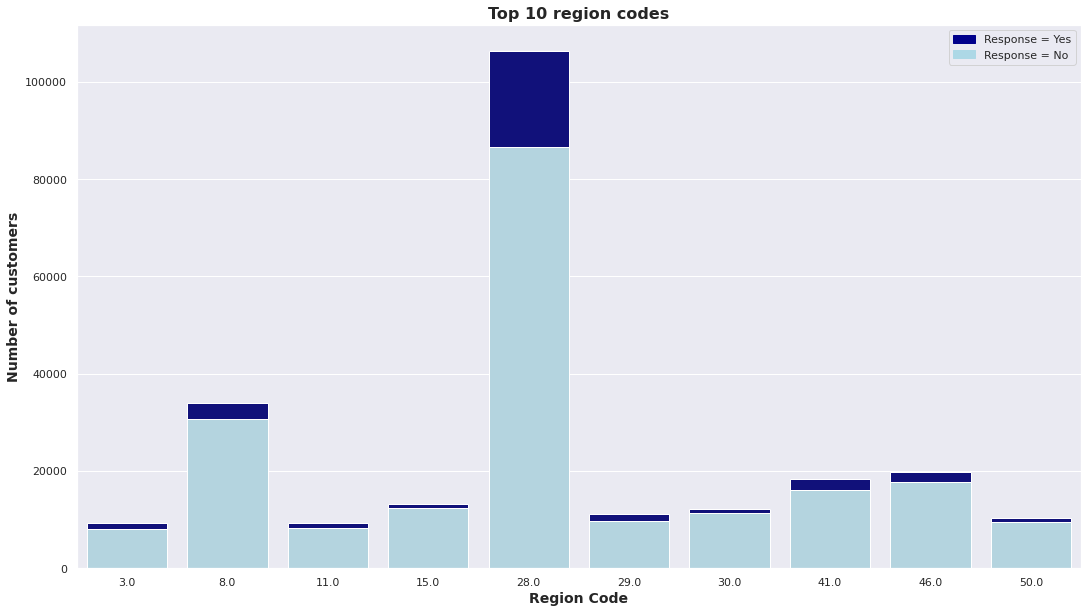

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(18,10))
bar1 = sns.barplot(x="Region_Code",  y="Total in region", data=bar_data, color='darkblue')
bar2 = sns.barplot(x="Region_Code",  y="Total No", data=bar_data, ci=None, color='lightblue')
# add legend
top_bar = mpatches.Patch(color='darkblue', label='Response = Yes')
bottom_bar = mpatches.Patch(color='lightblue', label='Response = No')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('Region Code', fontsize = 14, weight = "bold")
plt.ylabel('Number of customers', fontsize = 14, weight = "bold")
plt.title('Top 10 region codes', fontsize = 16, weight = "bold")
# show the graph
plt.show();

Region with code 28 has the most customers and perhaps the highest percentage of success in terms of cross selling. Overall a very small percentage of customers from the regions with most population buy our vehicle insurances.

It should be studied how we achieved huge success in Region 28 and perhaps implemented what worked there in the other regions.

####4.7 What is the distribution of vehicle age of our customers?

In [ ]:
bar_data = df.Vehicle_Age.value_counts(normalize=True).reset_index()
bar_data

index  Vehicle_Age
0   1-2 Year         0.53
1   < 1 Year         0.43
2  > 2 Years         0.04

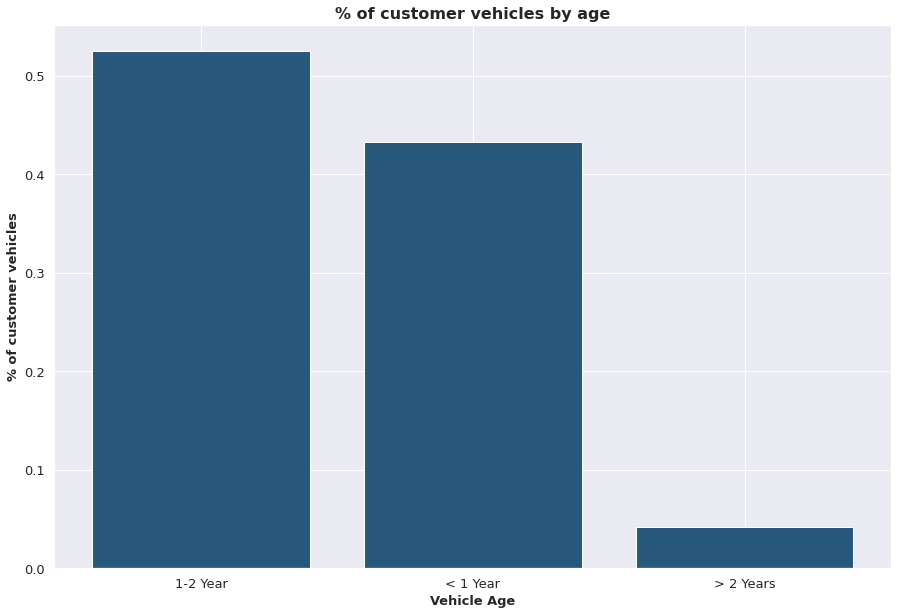

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Age'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer vehicles by age', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

There are not many vehicles very old, with only 4% older than 2 years. And more than half of the customers (53%) have vehicles between the age of 1 and 2 years. Rest 43% have vehicles lesser than a year old.

In [ ]:
bar_data = df_Response_Yes.Vehicle_Age.value_counts(normalize=True).reset_index()
bar_data

index  Vehicle_Age
0   1-2 Year         0.75
1   < 1 Year         0.15
2  > 2 Years         0.10

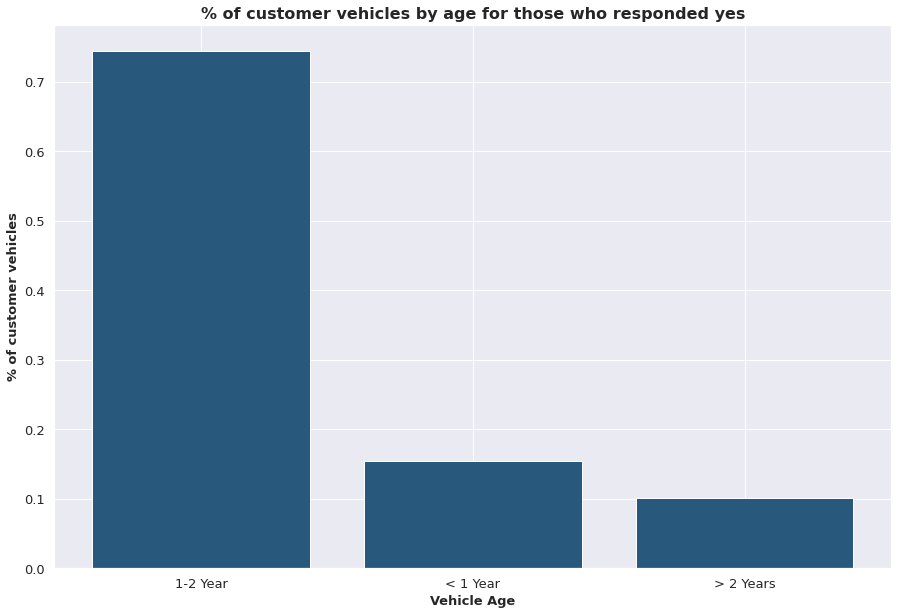

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Age'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer vehicles by age for those who responded yes', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

Customers with vehicles of age between 1 and 2 years have showed the most interest in our insurance. 3/4th of the customers who responded yes belong to this category. 

In [ ]:
bar_data = df_Response_No.Vehicle_Age.value_counts(normalize=True).reset_index()
bar_data

index  Vehicle_Age
0   1-2 Year         0.49
1   < 1 Year         0.47
2  > 2 Years         0.03

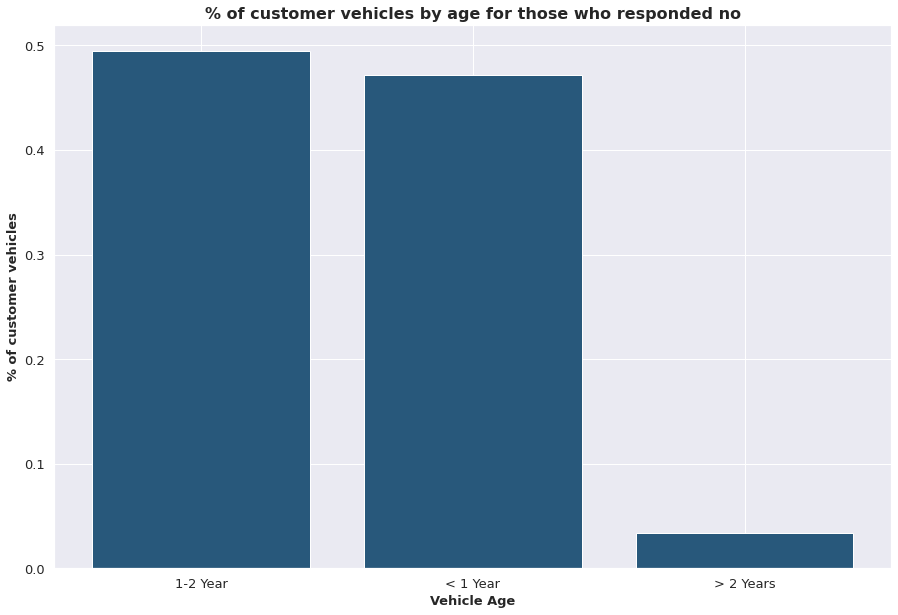

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Age'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer vehicles by age for those who responded no', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

The share of the customers who responded no grows for those who have vehicles of age less than a year. It is perhaps they already have an existing vehicle insurance.

####4.8 Understanding the Vehicle Damage distribution for the customers

In [ ]:
bar_data = df.Vehicle_Damage.value_counts(normalize=True).reset_index()
bar_data

index  Vehicle_Damage
0   Yes            0.50
1    No            0.50

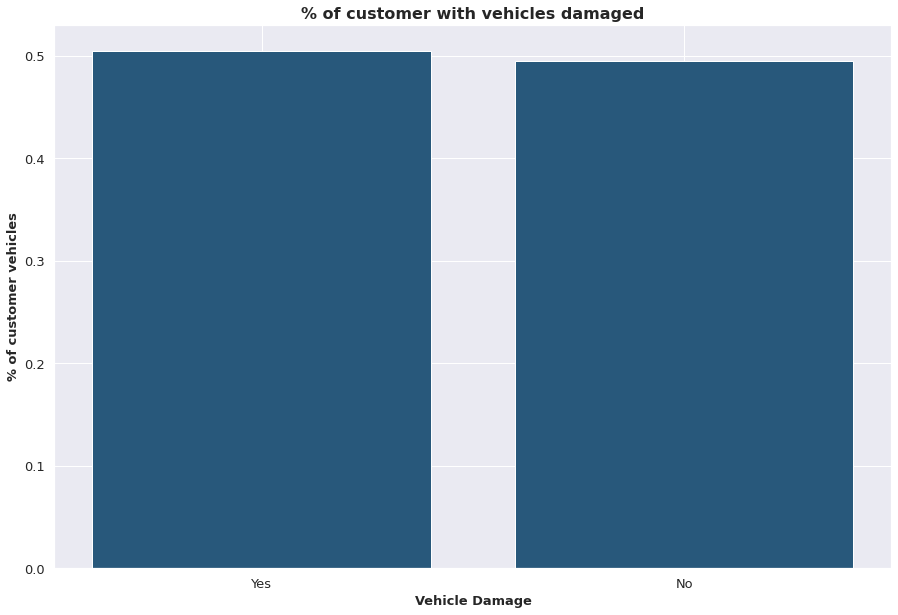

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Damage'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer with vehicles damaged', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Damage', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

The distribution of customers with damaged vehicles and customers without is almost equal.

In [ ]:
bar_data = df_Response_Yes.Vehicle_Damage.value_counts(normalize=True).reset_index()
bar_data

index  Vehicle_Damage
0   Yes            0.98
1    No            0.02

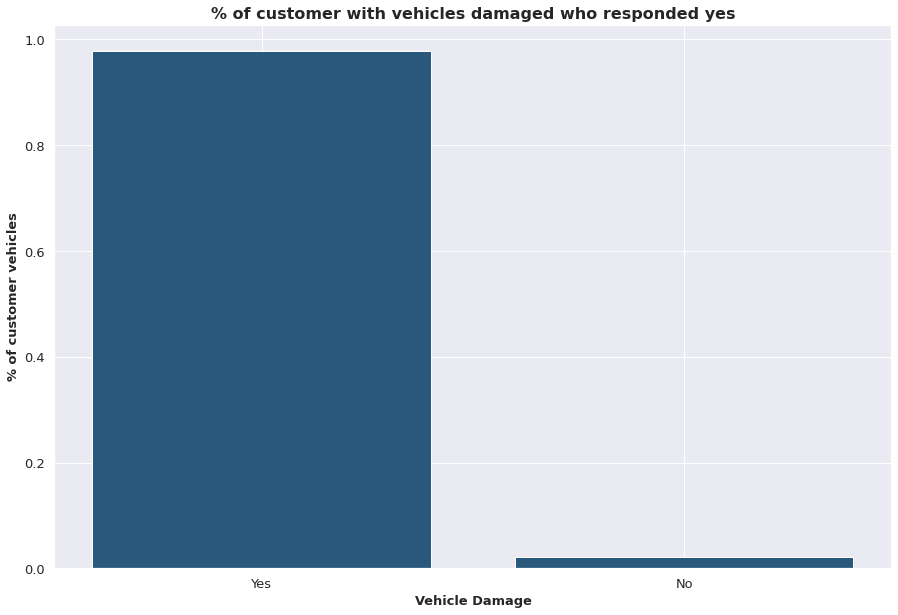

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Damage'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer with vehicles damaged who responded yes', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Damage', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

Almost all of the customers who responded yes to buying our vehicle insurance have damaged vehicle. Only 2% don't.

In [ ]:
bar_data = df_Response_No.Vehicle_Damage.value_counts(normalize=True).reset_index()
bar_data

index  Vehicle_Damage
0    No            0.56
1   Yes            0.44

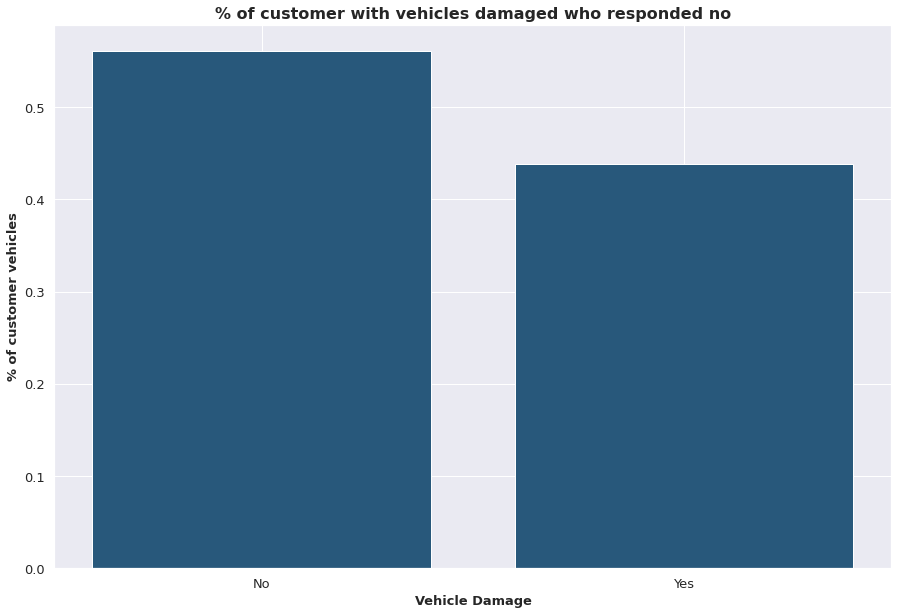

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Damage'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer with vehicles damaged who responded no', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Damage', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

56% of customers who responded no didn't have damaged vehicles. 

####4.9 Understanding the distribution of Annual Premiums paid by the customer

In [ ]:
# Preparing the data
temp = pd.concat([df['Annual_Premium'].describe(),df_Response_Yes['Annual_Premium'].describe(),df_Response_No['Annual_Premium'].describe()], axis=1)
temp.reset_index(inplace=True)
temp.columns = ['stat','Overall','Responded_Yes','Responded_No']
# Not including the distribution post 75% since two of the three room types have high volume of outliers
line_data = temp.iloc[3:7,:] 
line_data

stat  Overall  Responded_Yes  Responded_No
3  min  2630.00        2630.00       2630.00
4  25% 24405.00       24868.00      24351.00
5  50% 31669.00       33002.00      31504.00
6  75% 39400.00       41297.00      39120.00

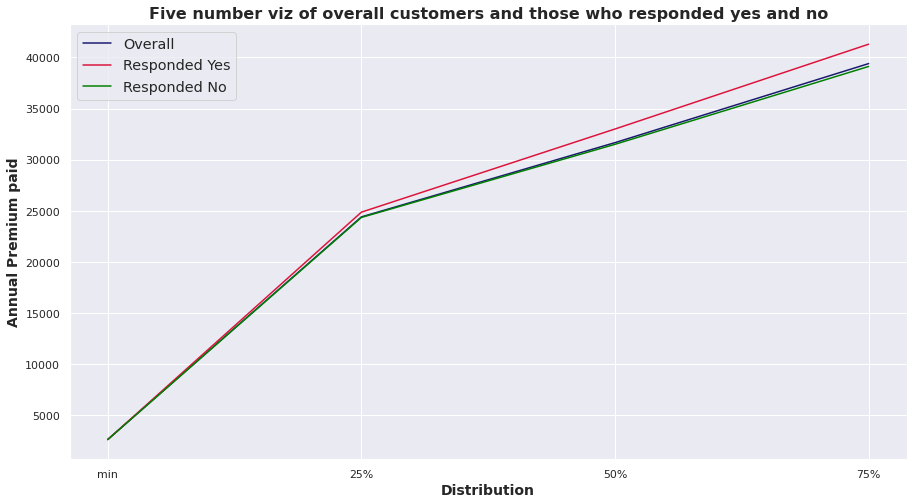

In [ ]:
# Setting the size of the figure
plt.figure(figsize = (15,8))
# Plotting the lines
plt.plot(line_data.stat, line_data.Overall, color = "midnightblue")
plt.plot(line_data.stat, line_data.Responded_Yes, color = "crimson")
plt.plot(line_data.stat, line_data.Responded_No, color = "green")
# Assigning the labels
plt.ylabel("Annual Premium paid", fontsize = 14, fontweight = "bold")
plt.xlabel("Distribution", fontsize = 14, fontweight = "bold")
# Adding labels
labels = ['Overall','Responded Yes','Responded No']
plt.legend(labels = labels, fontsize = "large")
plt.title("Five number viz of overall customers and those who responded yes and no", fontsize = 16, fontweight = "bold")
plt.show();

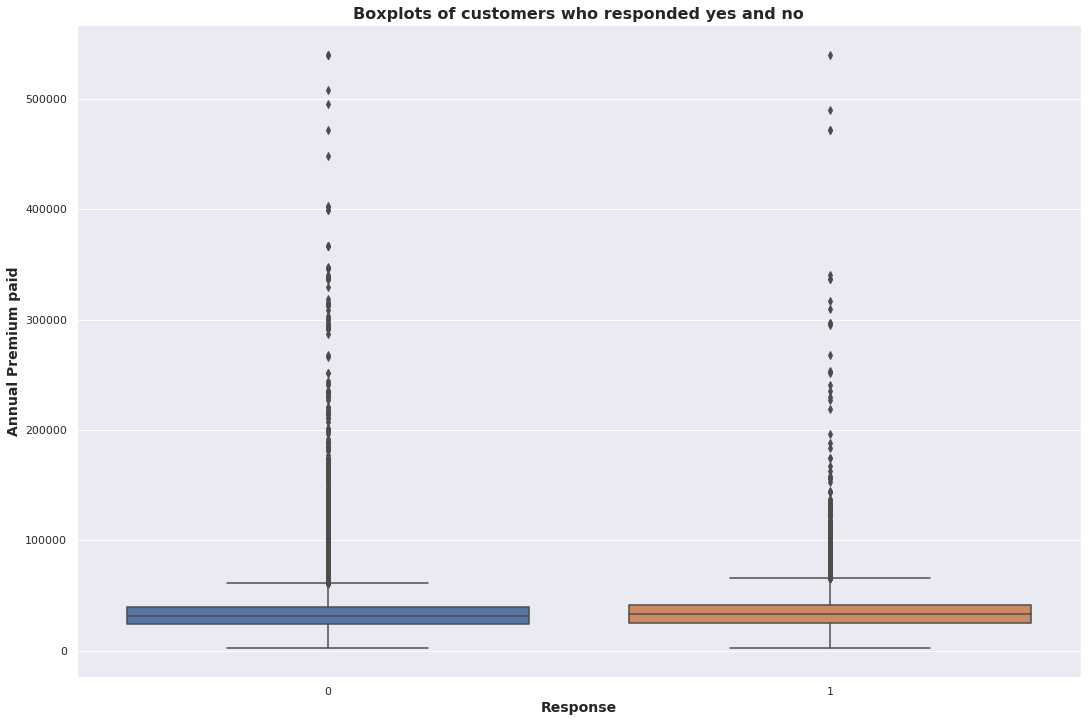

In [ ]:
# Plotting the boxplots for the two kinds
sns.set(style="darkgrid")
plt.figure(figsize = (18,12))
sns.boxplot(x='Response', y='Annual_Premium', data=df)
plt.ylabel("Annual Premium paid", fontsize = 14, fontweight = "bold")
plt.xlabel("Response", fontsize = 14, fontweight = "bold")
plt.title("Boxplots of customers who responded yes and no", fontsize = 16, fontweight = "bold")
plt.show();

The two types of customers (ones who responded yes and ones who responded no) seem to have similar distribution of their Annual Premium. The distribution is slightly higher for those who responded yes, but the difference is too little to seem significant for the 40-50 percentiles of the customers.

####4.10 Which are the top 10 Policy Channel Sales?

In [ ]:
temp = df.groupby('Policy_Sales_Channel').agg({'Policy_Sales_Channel':'count'}).rename(columns={'Policy_Sales_Channel':'Total'}).reset_index() #Overall count for each policy sales
temp.head()

Policy_Sales_Channel  Total
0                  1.00   1074
1                  2.00      4
2                  3.00    523
3                  4.00    509
4                  6.00      3

In [ ]:
temp1 = df_Response_Yes.groupby('Policy_Sales_Channel').agg({'Policy_Sales_Channel':'count'}).rename(columns = {'Policy_Sales_Channel':'Total Yes'}).reset_index() #Count of Yes for each policy sales channel
temp1.head()

Policy_Sales_Channel  Total Yes
0                  1.00         35
1                  2.00          1
2                  3.00        159
3                  4.00        102
4                  7.00        182

In [ ]:
temp2 = df_Response_No.groupby('Policy_Sales_Channel').agg({'Policy_Sales_Channel':'count'}).rename(columns = {'Policy_Sales_Channel':'Total No'}).reset_index() #Count of No for each policy sales channel
temp2.head()

Policy_Sales_Channel  Total No
0                  1.00      1039
1                  2.00         3
2                  3.00       364
3                  4.00       407
4                  6.00         3

In [ ]:
bar_data = pd.merge(left = temp, right = temp1, on = 'Policy_Sales_Channel') #Merging the first two dataframes
bar_data = pd.merge(left = bar_data, right = temp2, on = 'Policy_Sales_Channel') #Merging the merged dataframe with the last dataframe
bar_data = bar_data.sort_values(by = 'Total', ascending = False)
bar_data.head()

Policy_Sales_Channel   Total  Total Yes  Total No
109                152.00  134784       3858    130926
23                  26.00   79700      15891     63809
90                 124.00   73995      13996     59999
117                160.00   21779        475     21304
113                156.00   10661       2297      8364

In [ ]:
bar_data = bar_data.iloc[:10,:] #Selecting the data for top 10 policy sales channel
bar_data

Policy_Sales_Channel   Total  Total Yes  Total No
109                152.00  134784       3858    130926
23                  26.00   79700      15891     63809
90                 124.00   73995      13996     59999
117                160.00   21779        475     21304
113                156.00   10661       2297      8364
89                 122.00    9930       1720      8210
114                157.00    6684       1794      4890
111                154.00    5993       1474      4519
108                151.00    3885        122      3763
118                163.00    2893        880      2013

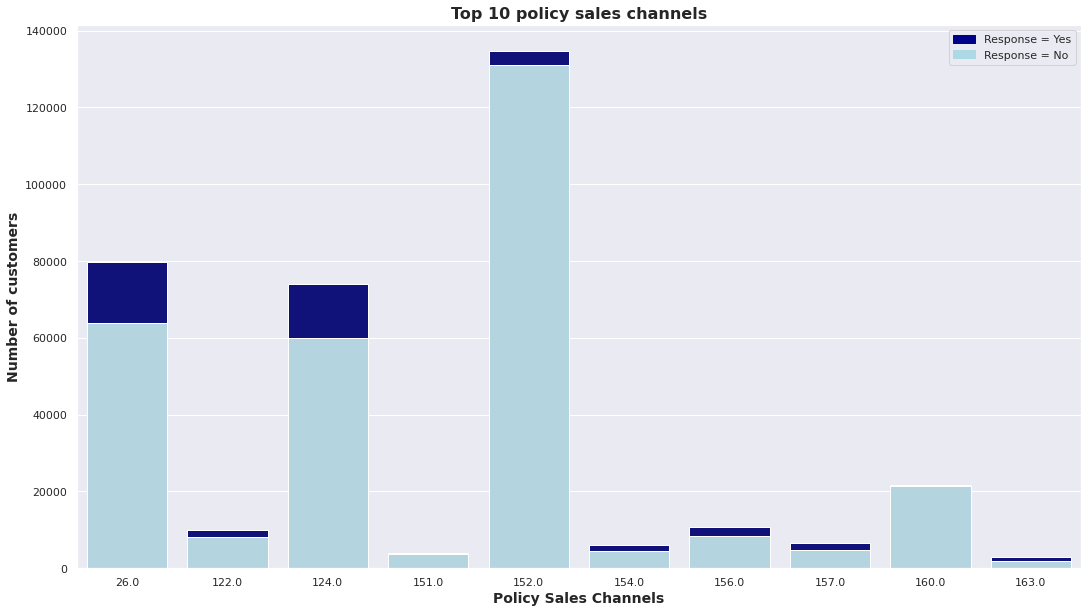

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(18,10))
bar1 = sns.barplot(x="Policy_Sales_Channel",  y="Total", data=bar_data, color='darkblue')
bar2 = sns.barplot(x="Policy_Sales_Channel",  y="Total No", data=bar_data, ci=None, color='lightblue')
# add legend
top_bar = mpatches.Patch(color='darkblue', label='Response = Yes')
bottom_bar = mpatches.Patch(color='lightblue', label='Response = No')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('Policy Sales Channels', fontsize = 14, weight = "bold")
plt.ylabel('Number of customers', fontsize = 14, weight = "bold")
plt.title('Top 10 policy sales channels', fontsize = 16, weight = "bold")
# show the graph
plt.show();

Policy Sales Channels 26.0 and 124.0 are working way better than the others whereas the policy sales channels 152 and 160 are resources wasted with very limited or no return at all.

It is advisable to focus the resources more on channels that do well.

####4.11 What is the distribution of Vintage?

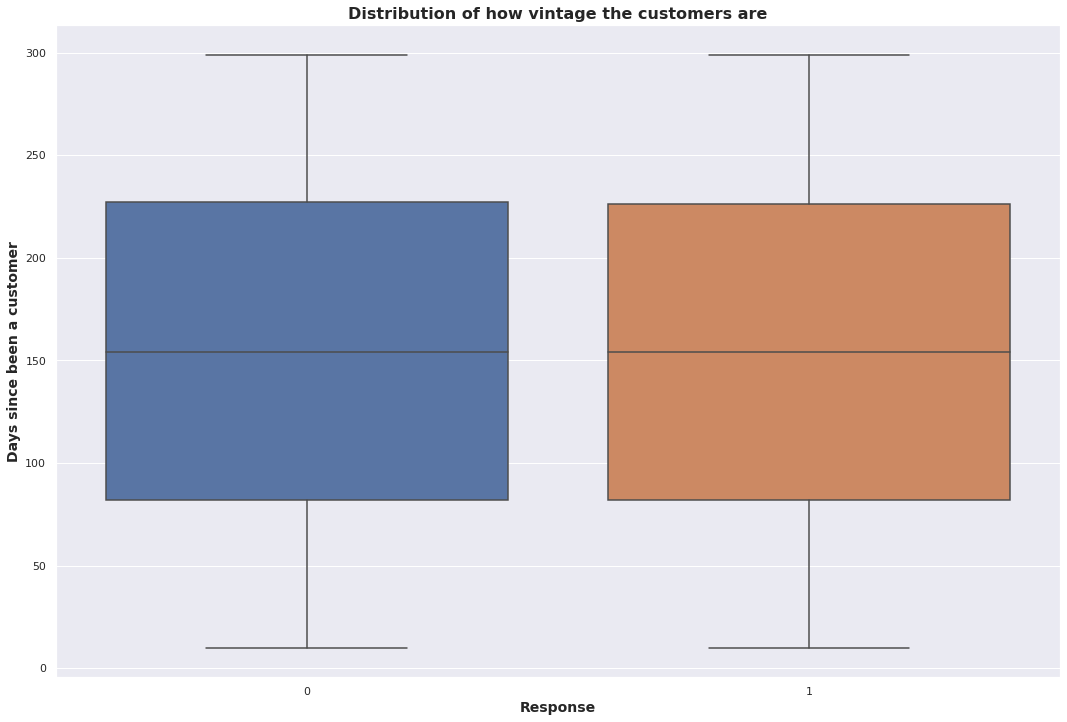

In [ ]:
# Plotting the boxplots for the two kinds
sns.set(style="darkgrid")
plt.figure(figsize = (18,12))
sns.boxplot(x='Response', y='Vintage', data=df)
plt.ylabel("Days since been a customer", fontsize = 14, fontweight = "bold")
plt.xlabel("Response", fontsize = 14, fontweight = "bold")
plt.title('Distribution of how vintage the customers are', fontsize = 16, fontweight = "bold")
plt.show();

The distribution of the customer's age with the company is same for both the types - ones who bought the vehicle insurance and ones who didn't.

####4.12 Correlation Heatmap

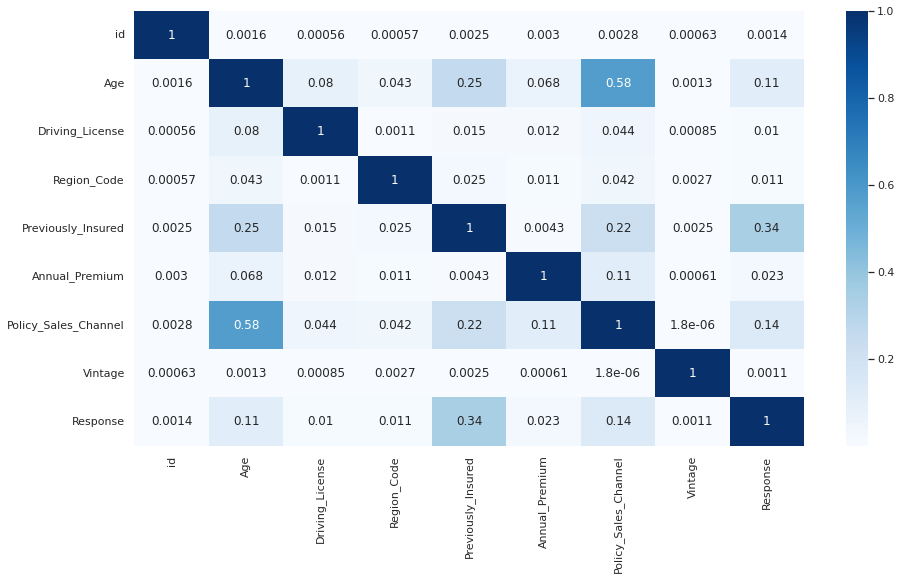

In [ ]:
# Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Blues')
plt.show();

No two numerical columns are showing any kind of linear relationship from the correlation heatmap.

####4.13 The distributions of all numeric columns and boxplots:

In [ ]:
# The numerical columns
numeric_features = ['Age', 'Annual_Premium', 'Vintage']

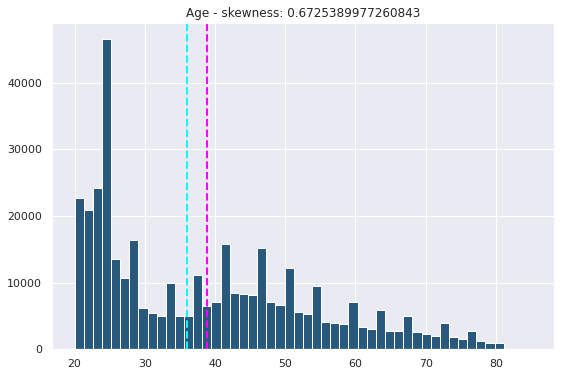

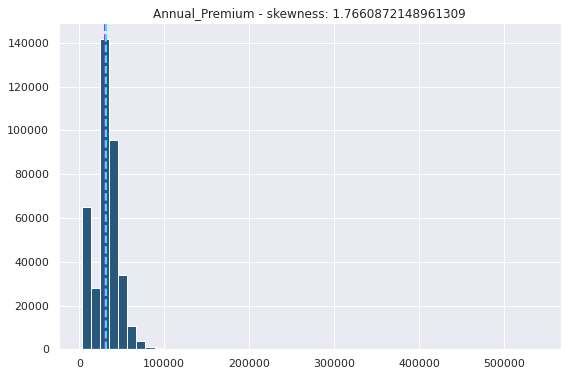

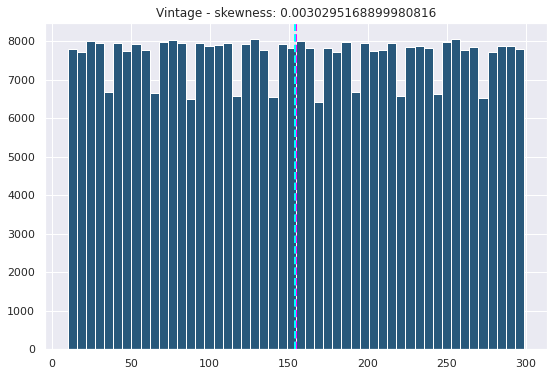

In [ ]:
# plot a bar plot for each numerical feature count
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax, color = '#28587B')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col + ' - skewness: ' + str(df[col].skew()))
plt.show();

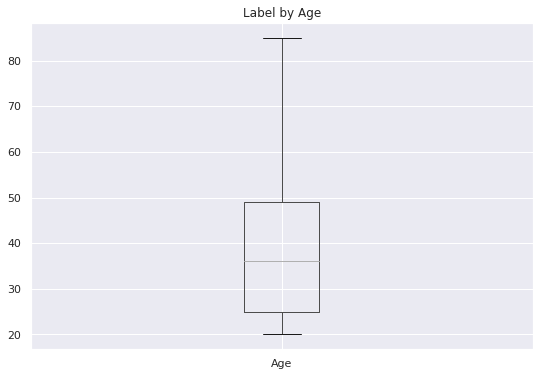

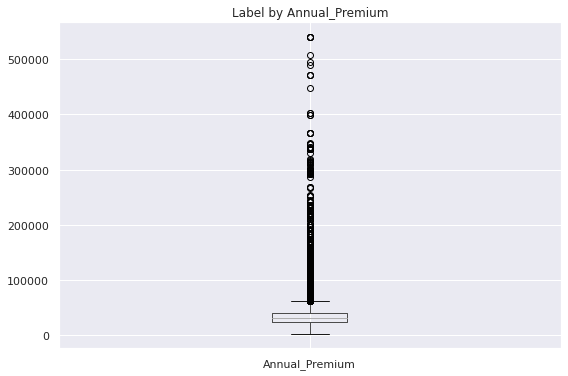

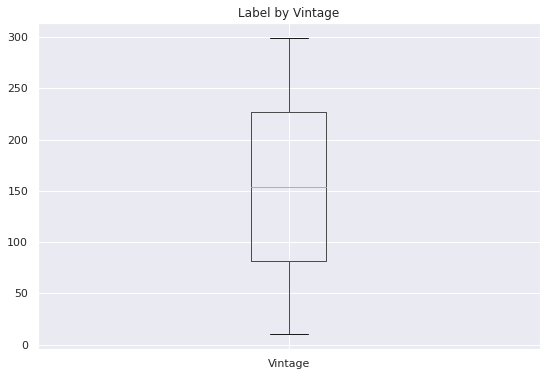

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    dataset.boxplot(col, ax = ax)
    ax.set_title('Label by ' + col)
plt.show();

None of the numerical columns have a symmetric Gaussian-like distribution. And Annual_Premium feature has a lot of outliers.

## ***5. Feature Engineering & Data Pre-processing***

#### 1. Handling Missing Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


No missing values in the dataset.

####2. Handling outliers

In [ ]:
#Finding Outliers
def detect_outliers(dataframe, numerical_columns):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in numerical_columns:
            q1 = dataframe[column].quantile(0.25) 
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

numerical_columns = ['Age', 'Annual_Premium', 'Vintage']
detect_outliers(df, numerical_columns)

Feature Number of Outliers
0             Age                  0
1  Annual_Premium              10320
2         Vintage                  0

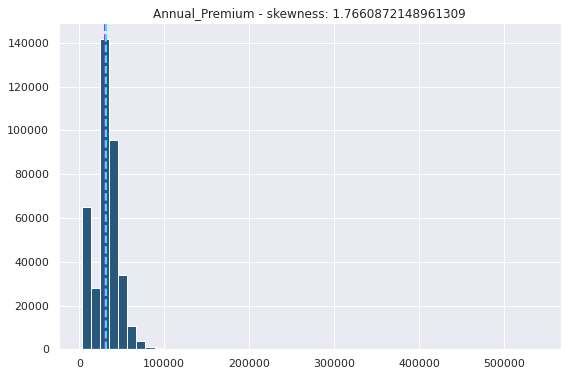

In [ ]:
# Checking the skewness
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = df['Annual_Premium']
feature.hist(bins=50, ax = ax, color = '#28587B')
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('Annual_Premium' + ' - skewness: ' + str(df['Annual_Premium'].skew()))
plt.show();

In [ ]:
iqr = df.Annual_Premium.quantile(0.75) - df.Annual_Premium.quantile(0.25)
bridge = df.Annual_Premium.median() + 3*iqr
df.loc[df['Annual_Premium']>= bridge, 'Annual_Premium'] = bridge

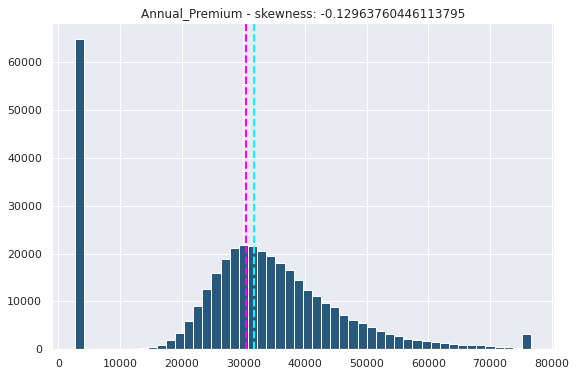

In [ ]:
# Checking the skewness
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = df['Annual_Premium']
feature.hist(bins=50, ax = ax, color = '#28587B')
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('Annual_Premium' + ' - skewness: ' + str(df['Annual_Premium'].skew()))
plt.show();

Only Annual_Premium column contains outliers. And so, after looking at its distribution, we decided to fix it using the IQR method, given the skewness of the distribution.

####3. Feature Manipulation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
# Seperating the categorical and numerical columns
cat_columns = ['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']
numerical_columns = ['Age', 'Annual_Premium', 'Vintage']

In [ ]:
# Creating new columns
# Creating cols based on Region Code and Annual Premium
df['Region_Premium_Mean'] = df.groupby('Region_Code')['Annual_Premium'].transform('mean')

# Creating cols based on Policy Sales Channel and Annual Premium
df['PSC_Premium_Mean'] = df.groupby('Policy_Sales_Channel')['Annual_Premium'].transform('mean')

# Creating cols based on Vehicle Damage and Annual Premium
df['VD_Premium_Mean'] = df.groupby('Vehicle_Damage')['Annual_Premium'].transform('mean')

# Creating cols based on Vehicle Damage and Annual Premium
df['VD_Age_Mean'] = df.groupby('Vehicle_Damage')['Age'].transform('mean')

# Creating cols based on Vehicle Damage and Annual Premium
df['VD_Vintage_Mean'] = df.groupby('Vehicle_Damage')['Vintage'].transform('mean')

# Creating cols based on Region Code and Age
df['Region_Age_Mean'] = df.groupby('Region_Code')['Age'].transform('mean')

# Creating cols based on Policy Sales Channel and Age
df['PSC_Age_Mean'] = df.groupby('Policy_Sales_Channel')['Age'].transform('mean')

# Creating cols based on Region Code and Vintage
df['Region_Vintage_Mean'] = df.groupby('Region_Code')['Vintage'].transform('mean')

# Creating cols based on Policy Sales Channel and Vintage
df['PSC_Vintage_Mean'] = df.groupby('Policy_Sales_Channel')['Vintage'].transform('mean')

# Creating cols based on Vehicle Age and Annual Premium
df['VA_Premium_Mean'] = df.groupby('Vehicle_Age')['Annual_Premium'].transform('mean')

# Creating cols based on Vehicle Age and Age
df['VA_Age_Mean'] = df.groupby('Vehicle_Age')['Age'].transform('mean')

# Creating cols based on Vehicle Age and Vintage
df['VA_Vintage_Mean'] = df.groupby('Vehicle_Age')['Vintage'].transform('mean')

# Creating cols based on Region Code, Policy Sales Channel and the numerical cols
df['RC_PSC_Age_Mean'] = df.groupby(['Region_Code', 'Policy_Sales_Channel'])['Age'].transform('mean')
df['RC_PSC_Vintage_Mean'] = df.groupby(['Region_Code', 'Policy_Sales_Channel'])['Vintage'].transform('mean')
df['RC_PSC_Annual_Premium_Mean'] = df.groupby(['Region_Code', 'Policy_Sales_Channel'])['Annual_Premium'].transform('mean')

# Creating cols based on Region Code, Vehicle Age and the numerical cols
df['RC_VA_Age_Mean'] = df.groupby(['Region_Code', 'Vehicle_Age'])['Age'].transform('mean')
df['RC_VA_Vintage_Mean'] = df.groupby(['Region_Code', 'Vehicle_Age'])['Vintage'].transform('mean')
df['RC_VA_Annual_Premium_Mean'] = df.groupby(['Region_Code', 'Vehicle_Age'])['Annual_Premium'].transform('mean')

# Creating cols based on Policy Sales Channel, Vehicle Age and the numerical cols
df['PSC_VA_Age_Mean'] = df.groupby(['Policy_Sales_Channel', 'Vehicle_Age'])['Age'].transform('mean')
df['PSC_VA_Vintage_Mean'] = df.groupby(['Policy_Sales_Channel', 'Vehicle_Age'])['Vintage'].transform('mean')
df['PSC_VA_Annual_Premium_Mean'] = df.groupby(['Policy_Sales_Channel', 'Vehicle_Age'])['Annual_Premium'].transform('mean')

# Creating cols based on previously insured counts for each cat col
df['PSC_PI_counts'] = df.groupby(['Policy_Sales_Channel'])['Previously_Insured'].transform('count')
df['RC_PI_counts'] = df.groupby(['Region_Code'])['Previously_Insured'].transform('count')
df['VA_PI_counts'] = df.groupby(['Vehicle_Age'])['Previously_Insured'].transform('count')

# Creating cols based on Vehicle Damage counts for each cat col
df['PSC_VD_counts'] = df.groupby(['Policy_Sales_Channel'])['Vehicle_Damage'].transform('count')
df['RC_VD_counts'] = df.groupby(['Region_Code'])['Vehicle_Damage'].transform('count')
df['VA_VD_counts'] = df.groupby(['Vehicle_Age'])['Vehicle_Damage'].transform('count')

# Creating cols based on Region Code, Vehicle Damage and each numerical col
df['RC_VD_Age_Mean'] = df.groupby(['Region_Code', 'Vehicle_Damage'])['Age'].transform('mean')
df['RC_VD_Vintage_Mean'] = df.groupby(['Region_Code', 'Vehicle_Damage'])['Vintage'].transform('mean')
df['RC_VD_Annual_Premium_Mean'] = df.groupby(['Region_Code', 'Vehicle_Damage'])['Annual_Premium'].transform('mean')

# Creating cols based on Region Code, Previously Insured and each numerical col
df['RC_PI_Age_Mean'] = df.groupby(['Region_Code', 'Previously_Insured'])['Age'].transform('mean')
df['RC_PI_Vintage_Mean'] = df.groupby(['Region_Code', 'Previously_Insured'])['Vintage'].transform('mean')
df['RC_PI_Annual_Premium_Mean'] = df.groupby(['Region_Code', 'Previously_Insured'])['Annual_Premium'].transform('mean')

# Creating cols based on Policy Sales Channel, Previously Insured and each numerical col
df['PSC_PI_Age_Mean'] = df.groupby(['Policy_Sales_Channel', 'Previously_Insured'])['Age'].transform('mean')
df['PSC_PI_Vintage_Mean'] = df.groupby(['Policy_Sales_Channel', 'Previously_Insured'])['Vintage'].transform('mean')
df['PSC_PI_Annual_Premium_Mean'] = df.groupby(['Policy_Sales_Channel', 'Previously_Insured'])['Annual_Premium'].transform('mean')

# Creating cols based on Vehicle Age, Previously Insured and each numerical col
df['VA_PI_Age_Mean'] = df.groupby(['Vehicle_Age', 'Previously_Insured'])['Age'].transform('mean')
df['VA_PI_Vintage_Mean'] = df.groupby(['Vehicle_Age', 'Previously_Insured'])['Vintage'].transform('mean')
df['VA_PI_Annual_Premium_Mean'] = df.groupby(['Vehicle_Age', 'Previously_Insured'])['Annual_Premium'].transform('mean')

# Binning the age column
df.loc[df.Age<=35, 'Age'] = 0
df.loc[(df.Age>35) & (df.Age<=50), 'Age'] = 1
df.loc[(df.Age>50) & (df.Age<=65), 'Age'] = 2
df.loc[df.Age>65, 'Age'] = 3

We have created several new features using multiple possible combinations of the existing numerical and categorical features in the dataset. These new features were created using the transform method on groupby data and by binning the age column.

####4. Categorical Encoding

In [ ]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male    1                1        28.00                   0   
1   2    Male    3                1         3.00                   0   
2   3    Male    1                1        28.00                   0   
3   4    Male    0                1        11.00                   1   
4   5  Female    0                1        41.00                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  ...  \
0   > 2 Years            Yes        40454.00                 26.00  ...   
1    1-2 Year             No        33536.00                 26.00  ...   
2   > 2 Years            Yes        38294.00                 26.00  ...   
3    < 1 Year             No        28619.00                152.00  ...   
4    < 1 Year             No        27496.00                152.00  ...   

   RC_VD_Annual_Premium_Mean  RC_PI_Age_Mean  RC_PI_Vintage_Mean  \
0                   38208.93           47.69              154.22   
1                   25295.77           40.02              154.54   
2                   38208.93           47.69              154.22   
3                   28572.53           30.13              155.17   
4                   31463.00           32.19              156.44   

   RC_PI_Annual_Premium_Mean  PSC_PI_Age_Mean  PSC_PI_Vintage_Mean  \
0                   38059.41            50.40               154.12   
1                   23533.67            50.40               154.12   
2                   38059.41            50.40               154.12   
3                   28809.05            26.28               154.92   
4                   31636.98            26.28               154.92   

   PSC_PI_Annual_Premium_Mean  VA_PI_Age_Mean  VA_PI_Vintage_Mean  \
0                    34132.95           55.18              154.63   
1                    34132.95           48.20              154.00   
2                    34132.95           55.18              154.63   
3                    31080.20           24.82              154.68   
4                    31080.20           24.82              154.68   

   VA_PI_Annual_Premium_Mean  
0                   35352.61  
1                   30332.12  
2                   35352.61  
3                   30610.56  
4                   30610.56  

[5 rows x 51 columns]

In [ ]:
# Label Encoding some of the categorical variables
dict_gender = {'Male':1, 'Female':0}
dict_vehicle_damage = {'Yes':1, 'No':0}
dict_vehicle_age = {'> 2 Years':3, '1-2 Year':2, '< 1 Year':1}

df['Gender'] = df['Gender'].map(dict_gender)
df['Vehicle_Damage'] = df['Vehicle_Damage'].map(dict_vehicle_damage)
df['Vehicle_Age'] = df['Vehicle_Age'].map(dict_vehicle_age)

In [ ]:
policy_df = df.Policy_Sales_Channel.value_counts(normalize=True).reset_index().sort_values(by='Policy_Sales_Channel')
policy_list = policy_df[policy_df['Policy_Sales_Channel']>=0.03]['index'].to_list()
print("Policy Sales Channels list with more than 3% values in the dataset: ", policy_list)
region_df = df.Region_Code.value_counts(normalize=True).reset_index().sort_values(by='Region_Code')
region_list = region_df[region_df['Region_Code']>=0.03]['index'].to_list()
print("\nRegion Code list with more than 3% values in the dataset: ", region_list)

Policy Sales Channels list with more than 3% values in the dataset:  [160.0, 124.0, 26.0, 152.0]

Region Code list with more than 3% values in the dataset:  [30.0, 15.0, 41.0, 46.0, 8.0, 28.0]


In [ ]:
# Changing the values in columns
df.loc[(~df.Policy_Sales_Channel.isin(policy_list)), 'Policy_Sales_Channel'] = -1
df.loc[(~df['Region_Code'].isin(region_list)), 'Region_Code'] = -1

In [ ]:
df.Policy_Sales_Channel.value_counts()

152.00    134784
26.00      79700
124.00     73995
-1.00      70851
160.00     21779
Name: Policy_Sales_Channel, dtype: int64

In [ ]:
df.Region_Code.value_counts()

-1.00    177306
28.00    106415
8.00      33877
46.00     19749
41.00     18263
15.00     13308
30.00     12191
Name: Region_Code, dtype: int64

In [ ]:
# One hot encoding
df = pd.get_dummies(df, columns = ['Policy_Sales_Channel', 'Region_Code'])
df

id  Gender  Age  Driving_License  Previously_Insured  Vehicle_Age  \
0            1       1    1                1                   0            3   
1            2       1    3                1                   0            2   
2            3       1    1                1                   0            3   
3            4       1    0                1                   1            1   
4            5       0    0                1                   1            1   
...        ...     ...  ...              ...                 ...          ...   
381104  381105       1    3                1                   1            2   
381105  381106       1    0                1                   1            1   
381106  381107       1    0                1                   1            1   
381107  381108       0    3                1                   0            3   
381108  381109       1    1                1                   0            2   

        Vehicle_Damage  Annual_Premium  Vintage  Response  ...  \
0                    1        40454.00      217         1  ...   
1                    0        33536.00      183         0  ...   
2                    1        38294.00       27         1  ...   
3                    0        28619.00      203         0  ...   
4                    0        27496.00       39         0  ...   
...                ...             ...      ...       ...  ...   
381104               0        30170.00       88         0  ...   
381105               0        40016.00      131         0  ...   
381106               0        35118.00      161         0  ...   
381107               1        44617.00       74         0  ...   
381108               0        41777.00      237         0  ...   

        Policy_Sales_Channel_124.0  Policy_Sales_Channel_152.0  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           1   
4                                0                           1   
...                            ...                         ...   
381104                           0                           0   
381105                           0                           1   
381106                           0                           0   
381107                           1                           0   
381108                           0                           0   

        Policy_Sales_Channel_160.0  Region_Code_-1.0  Region_Code_8.0  \
0                                0                 0                0   
1                                0                 1                0   
2                                0                 0                0   
3                                0                 1                0   
4                                0                 0                0   
...                            ...               ...              ...   
381104                           0                 1                0   
381105                           0                 1                0   
381106                           1                 0                0   
381107                           0                 1                0   
381108                           0                 1                0   

        Region_Code_15.0  Region_Code_28.0  Region_Code_30.0  \
0                      0                 1                 0   
1                      0                 0                 0   
2                      0                 1                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
381104                 0                 0                 0   
381105                 0                 0                 0   


We dummy encoded (one-hot encoded) the Region Code and Policy Sales Channels as they were codes that did not have any numerical meaning and we label encoded the Gender, Vehicle Age and Vehicle Damage columns.

But before dummy encoding the Region Code and Policy Sales Channels columns, we decided to group all the options with lesser than 3% of presence in the dataset.

####5. Feature Selection

In [ ]:
df = df.drop(columns = ['id', 'Driving_License'])

Dropped the only column we would not need.

In [ ]:
X = df.drop("Response", axis=1)
y = df["Response"]

In [ ]:
X.head(10)

Gender  Age  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0       1    1                   0            3               1   
1       1    3                   0            2               0   
2       1    1                   0            3               1   
3       1    0                   1            1               0   
4       0    0                   1            1               0   
5       0    0                   0            1               1   
6       1    0                   0            1               1   
7       0    2                   0            2               1   
8       0    0                   1            1               0   
9       0    0                   1            1               0   

   Annual_Premium  Vintage  Region_Premium_Mean  PSC_Premium_Mean  \
0        40454.00      217             38198.16          33372.66   
1        33536.00      183             24462.13          33372.66   
2        38294.00       27             38198.16          33372.66   
3        28619.00      203             27558.48          30741.22   
4        27496.00       39             30776.31          30741.22   
5         2630.00      176             27753.65          25493.09   
6        23367.00      249             27558.48          30741.22   
7        32031.00       72             38198.16          33372.66   
8        27619.00       28             24462.13          30741.22   
9        28771.00       80             25126.81          30741.22   

   VD_Premium_Mean  ...  Policy_Sales_Channel_124.0  \
0         30509.17  ...                           0   
1         30230.40  ...                           0   
2         30509.17  ...                           0   
3         30230.40  ...                           0   
4         30230.40  ...                           0   
5         30509.17  ...                           0   
6         30509.17  ...                           0   
7         30509.17  ...                           0   
8         30230.40  ...                           0   
9         30230.40  ...                           0   

   Policy_Sales_Channel_152.0  Policy_Sales_Channel_160.0  Region_Code_-1.0  \
0                           0                           0                 0   
1                           0                           0                 1   
2                           0                           0                 0   
3                           1                           0                 1   
4                           1                           0                 0   
5                           0                           1                 1   
6                           1                           0                 1   
7                           0                           0                 0   
8                           1                           0                 1   
9                           1                           0                 1   

   Region_Code_8.0  Region_Code_15.0  Region_Code_28.0  Region_Code_30.0  \
0                0                 0                 1                 0   
1                0                 0                 0                 0   
2                0                 0                 1                 0   
3                0                 0                 0                 0   
4                0                 0                 0                 0   
5                0                 0                 0                 0   
6                0                 0                 0                 0   
7                0                 0                 1                 0   
8                0                 0                 0                 0   
9                0                 0                 0                 0   

   Region_Code_41.0  Region_Code_46.0  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0             

We have dropped columns like Id and Driving_License. These have values that we believe won't help.

One important point of note here is that we have skipped over the process of eliminating the multicollinearity in the dataset. That is, because, the classification problem, the dataset and the kind of variables on hand point completely towards the use of tree based and ensemble based methods.

####6. Data Splitting

In [ ]:
 # split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("============================================")
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (285831, 58)
Number transactions y_train dataset:  (285831,)
Number transactions X_test dataset:  (95278, 58)
Number transactions y_test dataset:  (95278,)


We have decided to split the dataset between the train and test sets in the ratio 75:25.

####7. Data Scaling

In [ ]:
#Applying Standard Scaler
numerical_columns = X_train.describe().columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

To avoid data leakage, we have first split the dataset into train and test sets and then applied Standard Scaler over it. The dataset, after the application of Standard Scaler, brings the mean of each column down to 0 and the standard deviation of each column to 1.

####8. Handling Imbalanced Dataset

In [ ]:
# Oversampling
oversample = RandomOverSampler()
X_res, y_res = oversample.fit_resample(X_train, y_train)

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("============================================")
print("Number transactions X_res dataset: ", X_res.shape)
print("Number transactions y_res dataset: ", y_res.shape)
print("============================================")
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (285831, 58)
Number transactions y_train dataset:  (285831,)
Number transactions X_res dataset:  (501592, 58)
Number transactions y_res dataset:  (501592,)
Number transactions X_test dataset:  (95278, 58)
Number transactions y_test dataset:  (95278,)


In [ ]:
# Ratio of the two responses
print("Before over-sampling: ")
y_train.value_counts()
print("\n============================================")
print("After over-sampling: ")
y_res.value_counts()
print("\n============================================")
print("For test set: ")
y_test.value_counts(normalize=True)

Before over-sampling: 


0    250796
1     35035
Name: Response, dtype: int64


After over-sampling: 


1    250796
0    250796
Name: Response, dtype: int64


For test set: 


0   0.88
1   0.12
Name: Response, dtype: float64

We have used the Random Oversampler from the sklearn library to over sample the positive responses given how they were occupying only 12% of the dataset before the sampling. A more evenly distributed response helps us predict both the kinds of responses with ease.

## ***6. ML Model Implementation***

Before we begin modeling, let's decide the metric we will use to evaluate the models.

Normally, in a classification problem, the decision to use which metric depends a lot on the business domain. Recall, Precision and F1 are then some of the metrics taken into consideration to choose the best suitable one for our problem.

However, we have decided to go ahead with the RUC curve. The Area Under the RUC Curve, to be more specific. It is basically the plot of different True Positive Rates (TPR) vs the different False Positive Rates (FPR) and is usually used for two reasons:

a. To decide the classifier's threshold

b. To judge the models using the AUC score

We will use it to judge which model covers more area under the curve. Needless to say, larger the value, better the model. In an ideal scenario, it would be 1.

And if there comes a point where we can't make the decision just through AUC scores, we will use the Precision and Recall scores and find the model with the best pair.

#### Model Preparation

In [ ]:
# Model Building and Evaluation Functions
def plot_confusion_matrix_and_roc_curves(model, X_test, y_test, y_pred):

    fig, axes = plt.subplots(1,2, figsize=(22,5))

    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, ax = axes[0], annot=labels, fmt='',cmap='Blues')
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})

    # predict probabilities
    pred_proba = model.predict_proba(X_test)

    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.subplot(1, 2, 2)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)

    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})

    plt.legend(loc='best')
    plt.show()


def visualization(results_df, parameters):    

    def shorten_param(param_name):
        if "__" in param_name:
            return param_name.rsplit("__", 1)[1]
        return param_name

    column_results = [f"param_{name}" for name in parameters.keys()]
    column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

    results_df = results_df[column_results].sort_values("mean_test_score", ascending=False)
    results_df = results_df.rename(shorten_param, axis=1)

    for col in results_df.columns:
        if col == 'param_random_state':
            continue
        try:
            results_df[col] = results_df[col].astype(np.float64)
        except:
            continue

    fig = px.parallel_coordinates(
    results_df,
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Hyper Parameter Tuning',)
    fig.show()


def evaluation_metrics(name, independent_feature_length , y_pred, y_test):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)] #Log Loss

    metrics_df = pd.DataFrame(metrics_dict)

    print(metrics_df)
    return metrics_df


def hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model):

    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = 'roc_auc', n_jobs=-1, factor=3, cv = 5 )
    
    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'roc_auc', cv = 3, n_iter = 50, n_jobs=-1)

    else:
        tuned_mode = GridSearchCV(model, param_grid = parameters, scoring = 'roc_auc', n_jobs=-1, cv = 3)

    
    start_time = time.time() 
    
    tuned_model.fit(x_train, y_train)
    
    stop_time = time.time()

    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)

    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)

    return tuned_model


def perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model):
    print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)

    model.fit(x_train, y_train)
    untuned_train = model.predict(x_train)
    untuned_pred = model.predict(x_test)

    # Evaluation Metrics for train set before tuning
    print(f'\nEvaluation of {type(model).__name__} for training set before tuning:\n'+'-----'*10)
    pre_tune_train = evaluation_metrics(type(model).__name__, len(list(x_train.columns)), untuned_train, y_train)

    print()
    plot_confusion_matrix_and_roc_curves(model, x_train, y_train, untuned_train)

    # Evaluation Metrics for test set before tuning
    print(f'\nEvaluation of {type(model).__name__} for test set before tuning:\n'+'-----'*10)
    pre_tune_test = evaluation_metrics(type(model).__name__, len(list(x_train.columns)), untuned_pred, y_test)

    print()
    plot_confusion_matrix_and_roc_curves(model, x_test, y_test, untuned_pred)

    # Hyper-parameter tuning
    tuned_model = hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model)
    tuned_train = tuned_model.predict(x_train)
    tuned_pred = tuned_model.predict(x_test)

    # Evaluation Metrics for train set after tuning
    print(f'\nEvaluation of {type(model).__name__} for train set after tuning:\n'+'-----'*10)
    train_metrics_df = evaluation_metrics(type(model).__name__,len(list(x_train.columns)), tuned_train, y_train)
    train_metrics_df['Model'] = type(model).__name__+' train'

    print()
    plot_confusion_matrix_and_roc_curves(tuned_model.best_estimator_, x_train, y_train, tuned_train)
  
    # Evaluation Metrics for test set after tuning
    print(f'\nEvaluation of {type(model).__name__} for test set after tuning:\n'+'-----'*10)
    test_metrics_df = evaluation_metrics(type(model).__name__,len(list(x_train.columns)), tuned_pred, y_test)
    test_metrics_df['Model'] = type(model).__name__+' test'

    print()
    plot_confusion_matrix_and_roc_curves(tuned_model.best_estimator_, x_test, y_test, tuned_pred)

    visualization(pd.DataFrame(tuned_model.cv_results_), parameters)

    metrics_df = pd.concat([train_metrics_df, test_metrics_df], ignore_index = True)
    return metrics_df


def ml_algorithm_implementation(X_res, y_res, X_test, y_test, model, parameters, tuning_model):

    print('########'*8+'\n     <<<< '+f'Tuning Model: {tuning_model}'+' >>>>\n'+'********'*8)
             
    x_train, x_test, y_train, y_test = X_res, X_test, y_res, y_test

    metrics_df = perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model)
    return metrics_df

In [ ]:
# Selecting the fastest available method: Halving Randomized Search CV
Tuning_Method = "Halving_Randomized_Search_CV" #@param ["Halving_Randomized_Search_CV", "Grid_Search_CV", "Randomized_Search_CV"]

### ML Model - 1 - **Implementing Logistic Regression Model**

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
LogisticRegression
--------------------------------------------------

Evaluation of LogisticRegression for training set before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.80       0.73    0.94      0.82           0.80      7.32



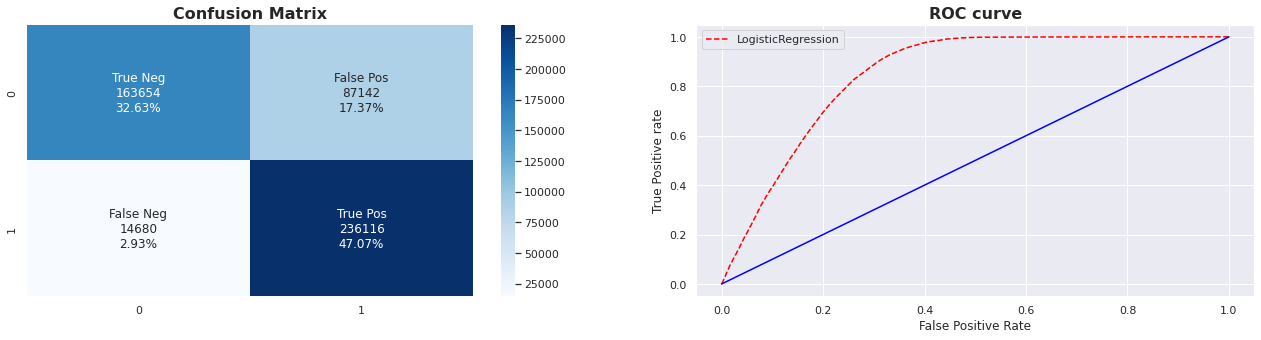


Evaluation of LogisticRegression for test set before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.69       0.27    0.94      0.42           0.80     11.31



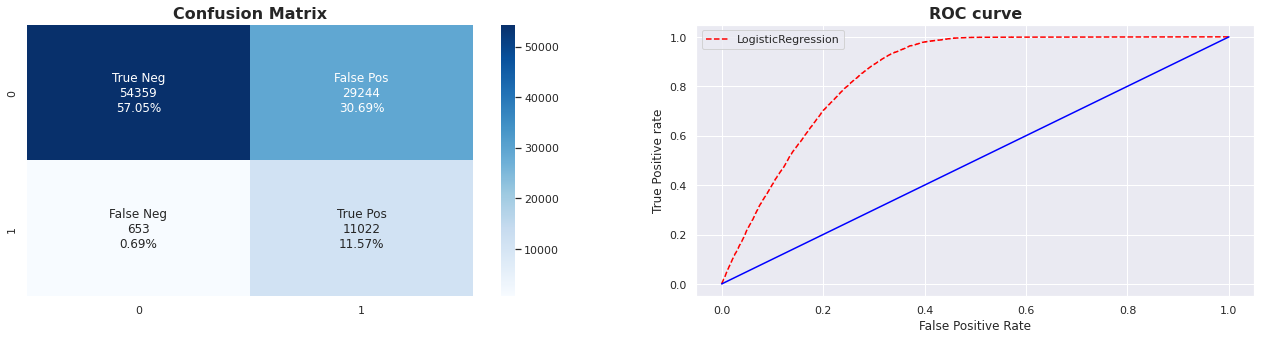

**************************************************
Best Score for LogisticRegression : 0.8203787062887026 
---
Best Parameters for LogisticRegression : {'random_state': 23, 'penalty': 'l2', 'l1_ratio': 0.8, 'C': 0.1}
--------------------------------------------------
Elapsed Time: 00:00:26

Evaluation of LogisticRegression for train set after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.80       0.73    0.94      0.82           0.80      7.32



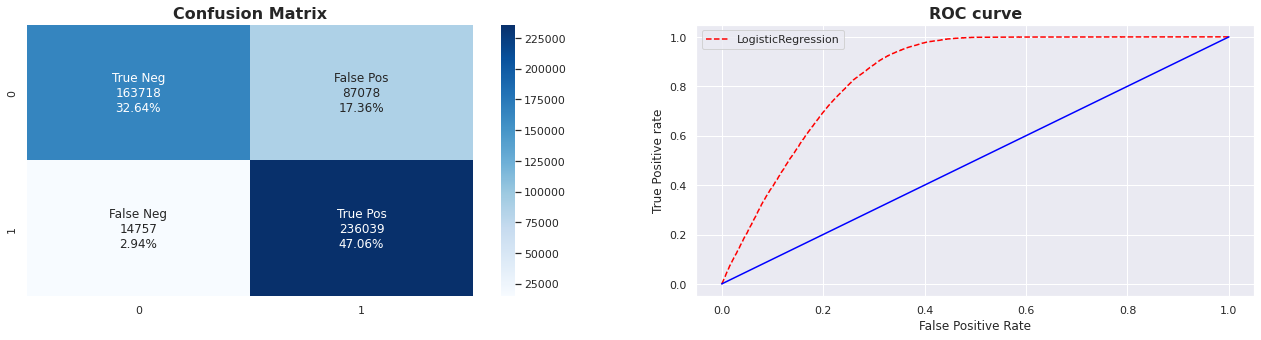


Evaluation of LogisticRegression for test set after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.69       0.27    0.94      0.42           0.80     11.30



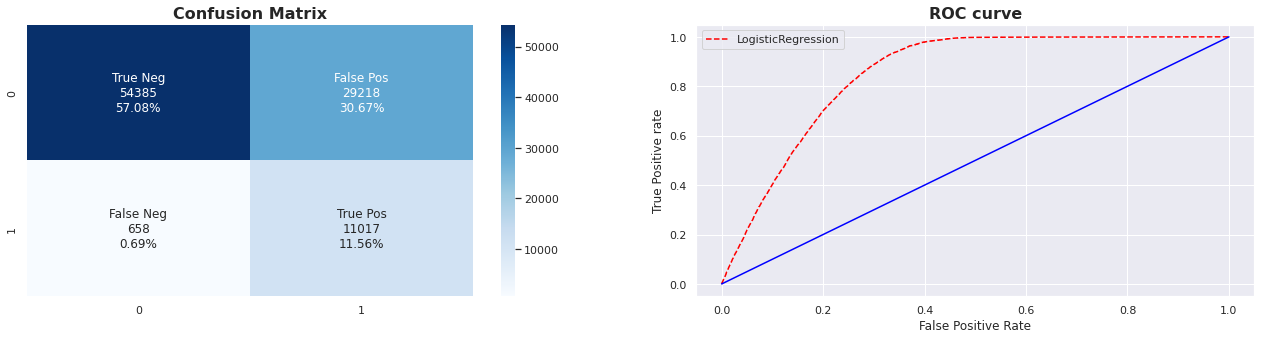

In [ ]:
# Logistic Regression Model
parameters_log_reg = {"penalty": ['l1','l2','elasticnet',None],
                      "C": [0.01,0.05,0.1,0.3,0.5,0.7,1],
                      "l1_ratio": [0.2,0.4,0.6,0.8],
                      "random_state":[23]}

log_metrics = ml_algorithm_implementation(X_res, y_res, X_test, y_test, LogisticRegression(), parameters_log_reg, Tuning_Method)

In [ ]:
log_metrics

Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss  \
0            0.80       0.73    0.94      0.82           0.80      7.32   
1            0.69       0.27    0.94      0.42           0.80     11.30   

                      Model  
0  LogisticRegression train  
1   LogisticRegression test

In [ ]:
# Fitting the final logistic model for feature importance
logmodel = LogisticRegression(random_state = 23, penalty = 'l2', l1_ratio = 0.4, C = 0.1)
logmodel.fit(X_res, y_res)

LogisticRegression(C=0.1, l1_ratio=0.4, random_state=23)

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
# Feature Importance
importances = logmodel.coef_[0]
indices = np.argsort(importances)[::]
columns = X_train.columns.values[indices[:5]]
values = importances[indices[:5]]

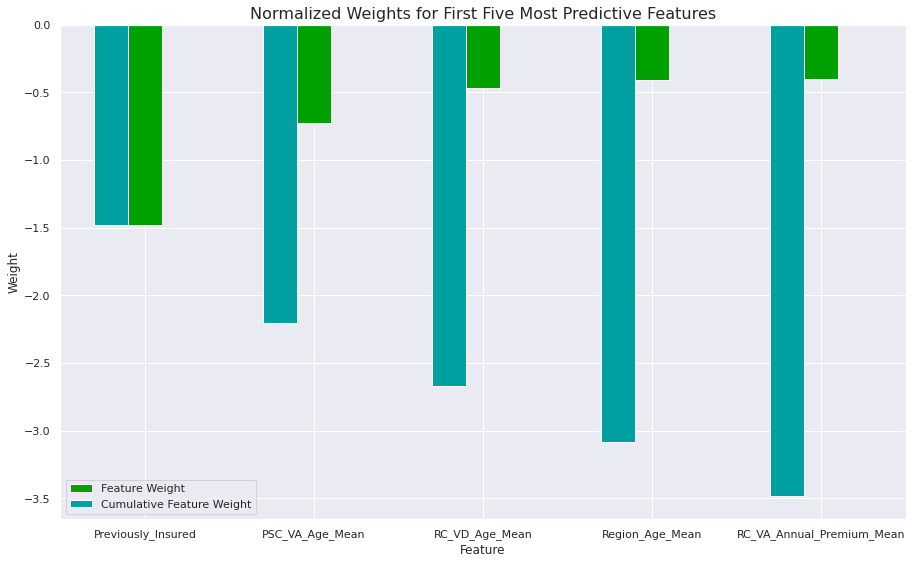

In [ ]:
# Creat the plot
fig = plt.figure(figsize = (13,8))
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', label = "Feature Weight")
plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', label = "Cumulative Feature Weight")
plt.xticks(np.arange(5), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize = 12)
plt.xlabel("Feature", fontsize = 12) 
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show();

The weights are highest for the newly created features. However, when we look at the weights, it tells us that the new features are not doing as well with the logistic regression model as one would expect.

And so, we are majorly going to focus on the tree based models. As for the performance, we got an ROC_AUC score of 0.8.

### ML Model - 2 - **Implementing Decision Tree Classifier Model**

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
DecisionTreeClassifier
--------------------------------------------------

Evaluation of DecisionTreeClassifier for training set before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            1.00       1.00    1.00      1.00           1.00      0.04



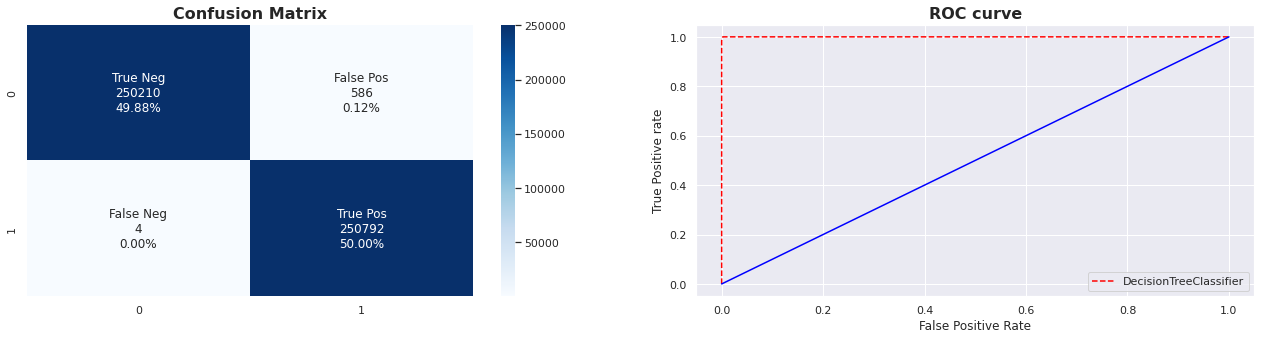


Evaluation of DecisionTreeClassifier for test set before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.83       0.29    0.28      0.28           0.59      6.23



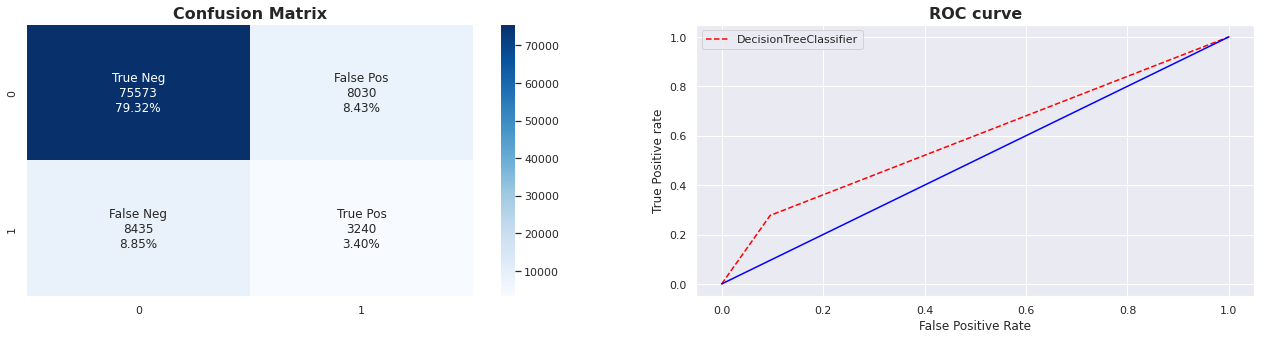

**************************************************
Best Score for DecisionTreeClassifier : 0.8329335427343848 
---
Best Parameters for DecisionTreeClassifier : {'splitter': 'best', 'random_state': 23, 'min_weight_fraction_leaf': 0.07, 'min_samples_leaf': 8, 'max_leaf_nodes': 70, 'max_features': None, 'max_depth': 6}
--------------------------------------------------
Elapsed Time: 00:09:35

Evaluation of DecisionTreeClassifier for train set after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.78       0.73    0.89      0.80           0.78      7.87



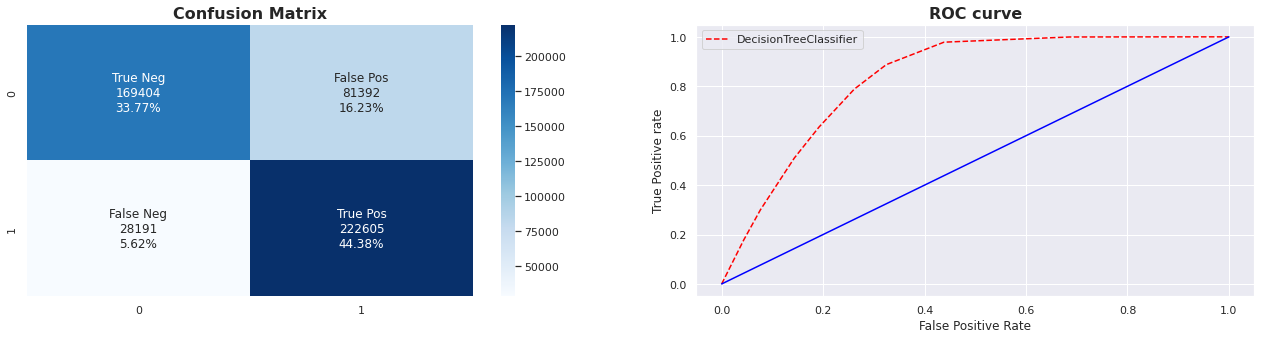


Evaluation of DecisionTreeClassifier for test set after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.70       0.28    0.89      0.42           0.78     10.81



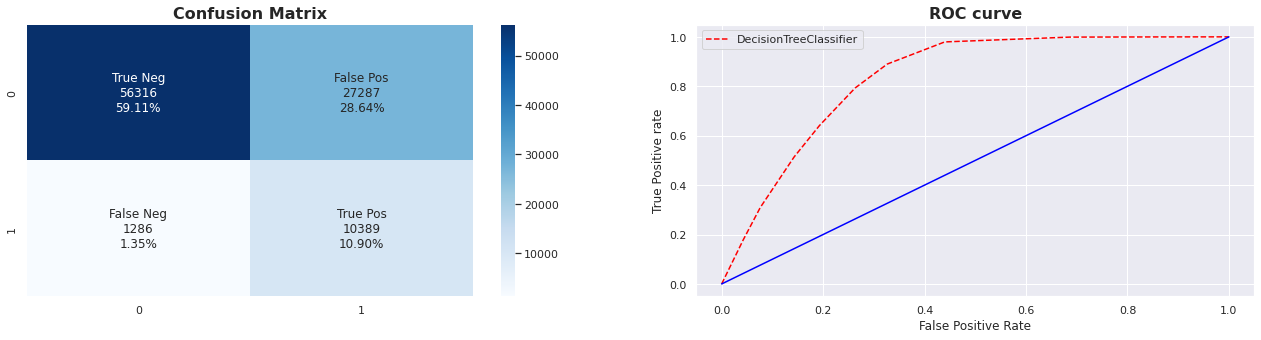

In [ ]:
# Decision Tree Model for Oversampled training set
parameters_decision_tree = {"splitter":["best","random"],
                            "max_depth" : [None,2,3,4,5,6],
                            "min_samples_leaf":[4,5,6,7,8],
                            "min_weight_fraction_leaf":[0.03,0.04,0.05,0.06,0.07],
                            "max_features":["auto","log2","sqrt",None],
                            "max_leaf_nodes":[50,55,60,65,70],
                            "random_state":[23]}

dt_metrics = ml_algorithm_implementation(X_res, y_res, X_test, y_test, DecisionTreeClassifier(), parameters_decision_tree, Tuning_Method)

In [ ]:
dt_metrics

Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss  \
0            0.78       0.73    0.89      0.80           0.78      7.87   
1            0.70       0.28    0.89      0.42           0.78     10.81   

                          Model  
0  DecisionTreeClassifier train  
1   DecisionTreeClassifier test

In [ ]:
# Fitting the final decision tree model for feature importance
dtmodel = DecisionTreeClassifier(splitter = 'best', random_state = 23, min_weight_fraction_leaf = 0.04, min_samples_leaf = 6, max_leaf_nodes = 70, max_features = None, max_depth = 3)
dtmodel.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=70, min_samples_leaf=6,
                       min_weight_fraction_leaf=0.04, random_state=23)

In [ ]:
y_pred = dtmodel.predict(X_test)

In [ ]:
# Feature Importance
feat_dict= {}
for col, val in sorted(zip(X_train.columns, dtmodel.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
values = feat_df['Importance'][:5]

In [ ]:
columns = feat_df['Feature'][:5]

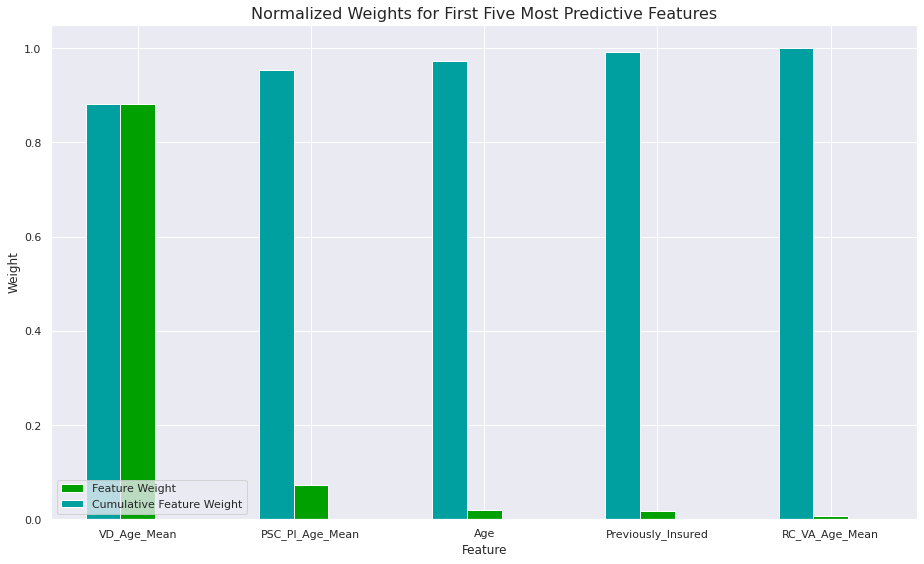

In [ ]:
# Creat the plot
fig = plt.figure(figsize = (13,8))
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', label = "Feature Weight")
plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', label = "Cumulative Feature Weight")
plt.xticks(np.arange(5), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize = 12)
plt.xlabel("Feature", fontsize = 12) 
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show();

The ROC AUC score for the model is lower than the Logistic Regression one. And the model puts very heavy emphasis on a single column. So, we will keep looking for better models.

### ML Model - 3 - **Implementing Random Forest Classifier Model**

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
RandomForestClassifier
--------------------------------------------------

Evaluation of RandomForestClassifier for training set before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            1.00       1.00    1.00      1.00           1.00      0.04



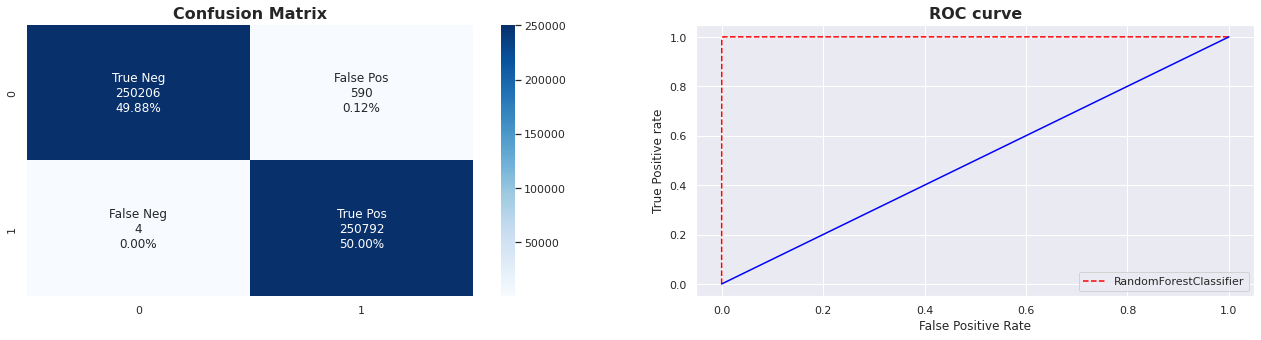


Evaluation of RandomForestClassifier for test set before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.83       0.31    0.32      0.31           0.61      6.17



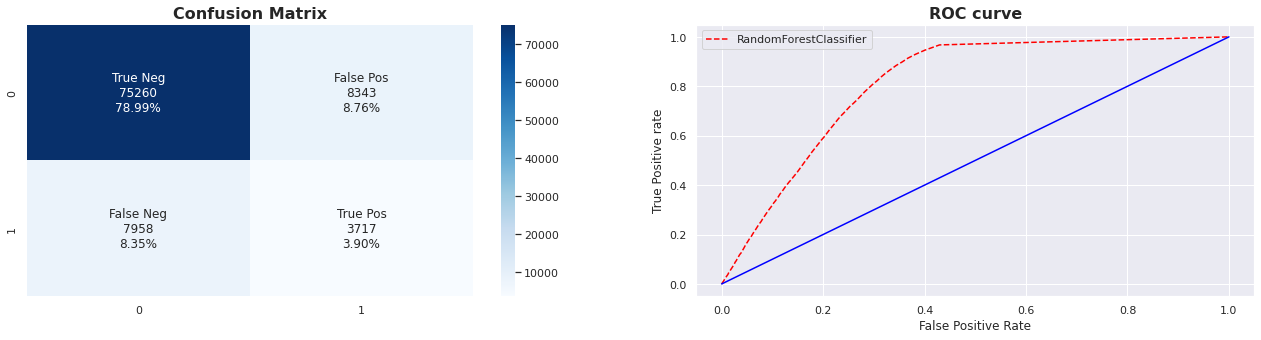

**************************************************
Best Score for RandomForestClassifier : 0.8463948533719604 
---
Best Parameters for RandomForestClassifier : {'random_state': 23, 'n_estimators': 70, 'min_samples_split': 50, 'min_samples_leaf': 10, 'max_depth': 6}
--------------------------------------------------
Elapsed Time: 00:09:55

Evaluation of RandomForestClassifier for train set after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.80       0.73    0.93      0.82           0.80      7.28



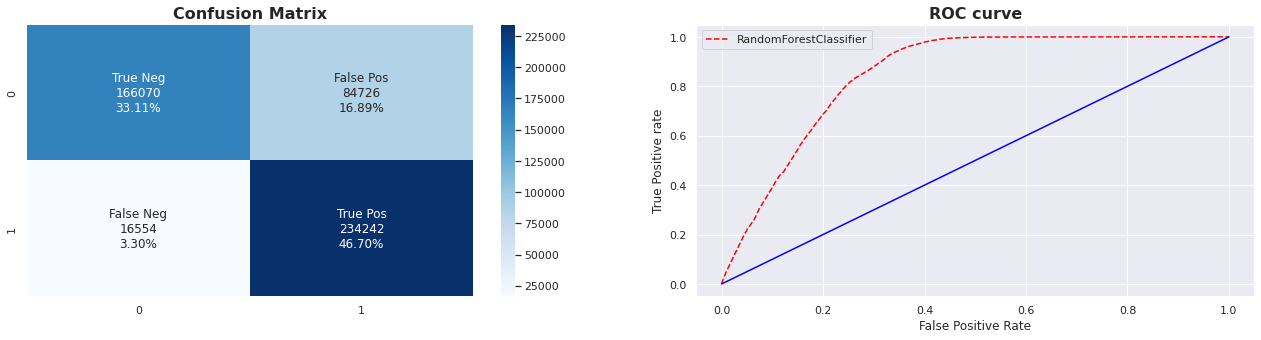


Evaluation of RandomForestClassifier for test set after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.69       0.28    0.93      0.43           0.80     11.05



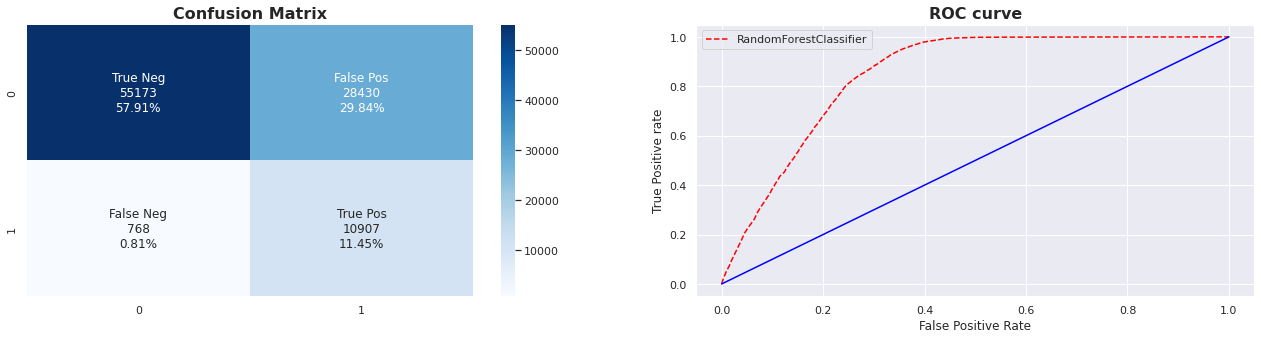

In [ ]:
parameters_random_forest = {'n_estimators' : [50,55,60,65,70],
                            'max_depth' : [4,5,6,7,8],
                            'min_samples_split' : [40,45,50,55,60],
                            'min_samples_leaf' : [10,15,20,25,30],
                            "random_state": [23]}

rf_metrics = ml_algorithm_implementation(X_res, y_res, X_test, y_test, RandomForestClassifier(), parameters_random_forest, Tuning_Method)

In [ ]:
rf_metrics

Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss  \
0            0.80       0.73    0.93      0.82           0.80      7.27   
1            0.69       0.28    0.93      0.43           0.80     11.06   

                          Model  
0  RandomForestClassifier train  
1   RandomForestClassifier test

In [ ]:
rfmodel = RandomForestClassifier(random_state = 23, n_estimators = 70, min_samples_split = 45, min_samples_leaf = 10, max_depth = 6)
rfmodel.fit(X_res, y_res)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=45,
                       n_estimators=70, random_state=23)

In [ ]:
y_pred = rfmodel.predict(X_test)

In [ ]:
# Feature Importance
feat_dict= {}
for col, val in sorted(zip(X_train.columns, rfmodel.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
values = feat_df['Importance'][:5]
columns = feat_df['Feature'][:5]

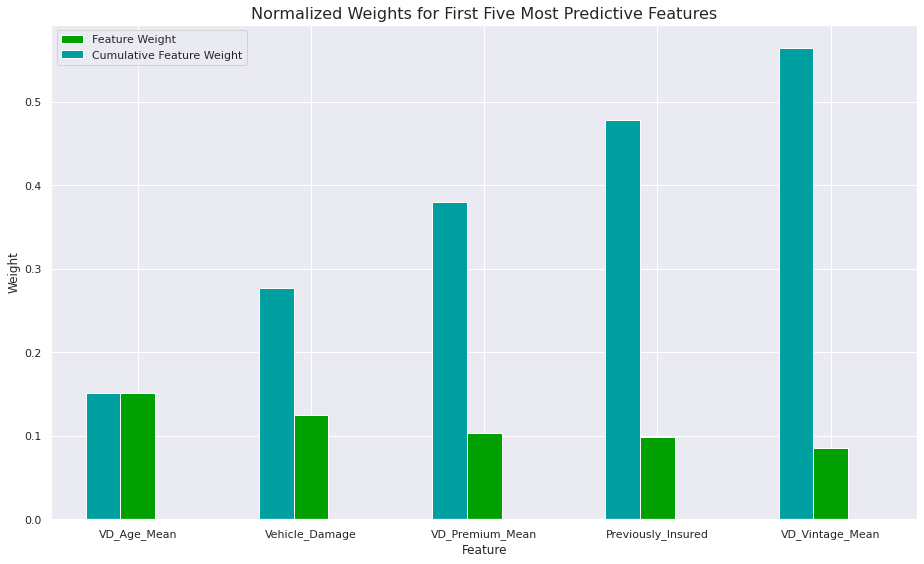

In [ ]:
# Creat the plot
fig = plt.figure(figsize = (13,8))
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', label = "Feature Weight")
plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', label = "Cumulative Feature Weight")
plt.xticks(np.arange(5), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize = 12)
plt.xlabel("Feature", fontsize = 12) 
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show();

The Random Forest model has a more evenly distributed feature importance and it also matches the Logistic Regression model for the ROC AUC score. Precision is a percent higher and recall is 0.93.

### ML Model - 4 - **Implementing Gradient Boosting Classifier Model**

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
GradientBoostingClassifier
--------------------------------------------------

Evaluation of GradientBoostingClassifier for training set before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.80       0.74    0.93      0.82           0.80      7.20



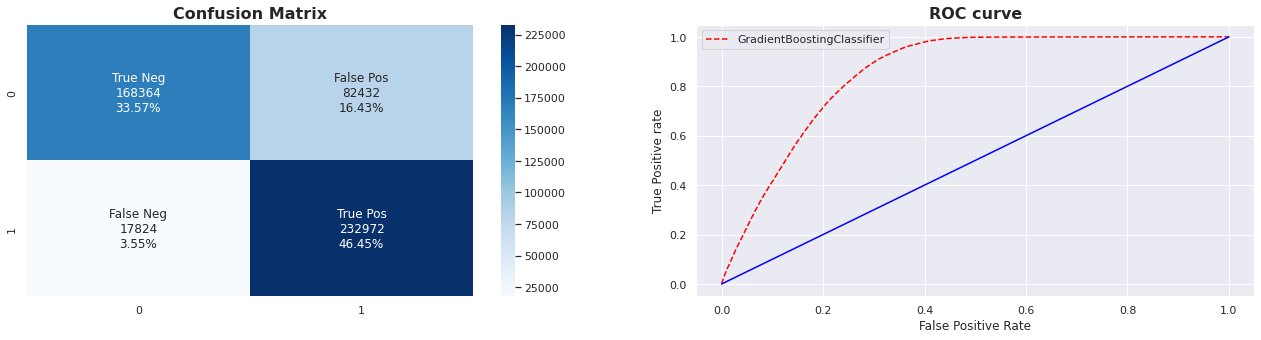


Evaluation of GradientBoostingClassifier for test set before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.70       0.28    0.93      0.43           0.80     10.76



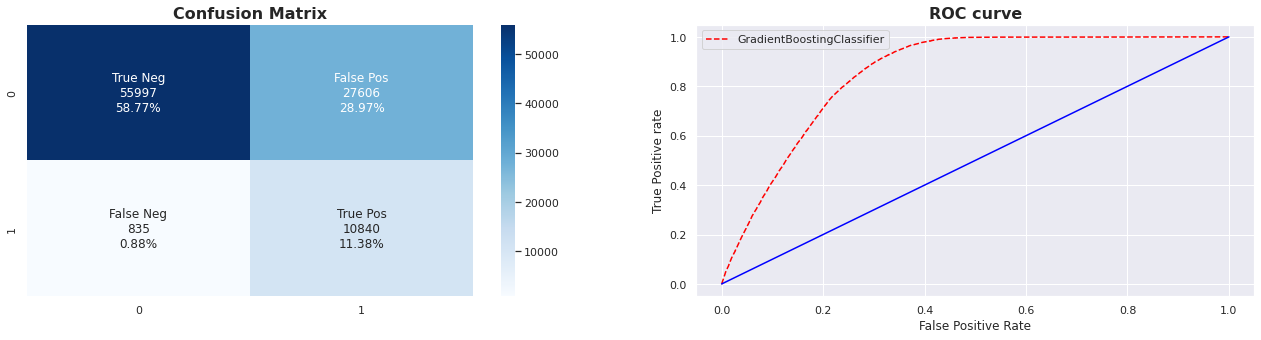

**************************************************
Best Score for GradientBoostingClassifier : 0.8477550370211068 
---
Best Parameters for GradientBoostingClassifier : {'subsample': 0.6, 'random_state': 23, 'min_samples_split': 55, 'min_samples_leaf': 30, 'max_depth': 4, 'learning_rate': 0.01}
--------------------------------------------------
Elapsed Time: 00:40:01

Evaluation of GradientBoostingClassifier for train set after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.80       0.73    0.94      0.82           0.80      7.30



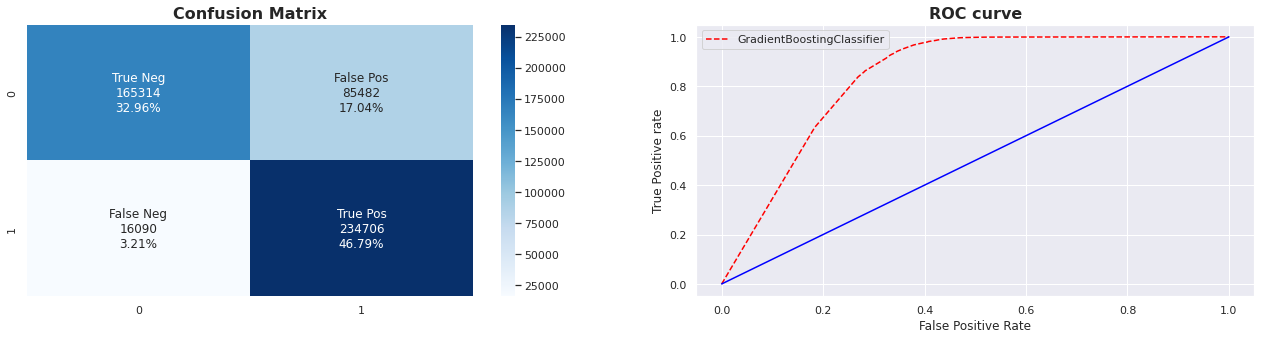


Evaluation of GradientBoostingClassifier for test set after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.69       0.28    0.94      0.43           0.80     11.14



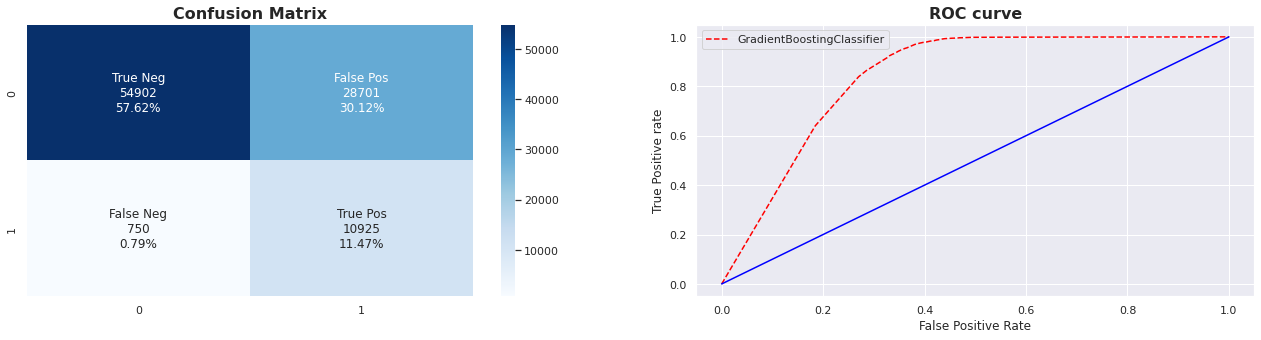

In [ ]:
parameters_grad_boost = {'learning_rate': [0.001,0.005,0.01,0.015,0.02],
                         'subsample': [0.5,0.6,0.7,0.8,0.9],
                         'min_samples_split' : [40,45,50,55,60],
                         'min_samples_leaf' : [10,15,20,25,30],
                         'max_depth' : [3,4,5,6,7],
                         "random_state":[23]}

gb_metrics = ml_algorithm_implementation(X_res, y_res, X_test, y_test, GradientBoostingClassifier(), parameters_grad_boost, Tuning_Method) 

In [ ]:
gb_metrics

Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss  \
0            0.80       0.73    0.94      0.82           0.80      7.30   
1            0.69       0.28    0.94      0.43           0.80     11.14   

                              Model  
0  GradientBoostingClassifier train  
1   GradientBoostingClassifier test

In [ ]:
gbmodel = GradientBoostingClassifier(subsample = 0.5, random_state = 23, min_samples_split = 60, min_samples_leaf = 20, max_depth = 7, learning_rate = 0.005)
gbmodel.fit(X_res, y_res)

GradientBoostingClassifier(learning_rate=0.005, max_depth=7,
                           min_samples_leaf=20, min_samples_split=60,
                           random_state=23, subsample=0.5)

In [ ]:
y_pred = gbmodel.predict(X_test)

In [ ]:
# Feature Importance
feat_dict= {}
for col, val in sorted(zip(X_train.columns, gbmodel.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
values = feat_df['Importance'][:5]
columns = feat_df['Feature'][:5]

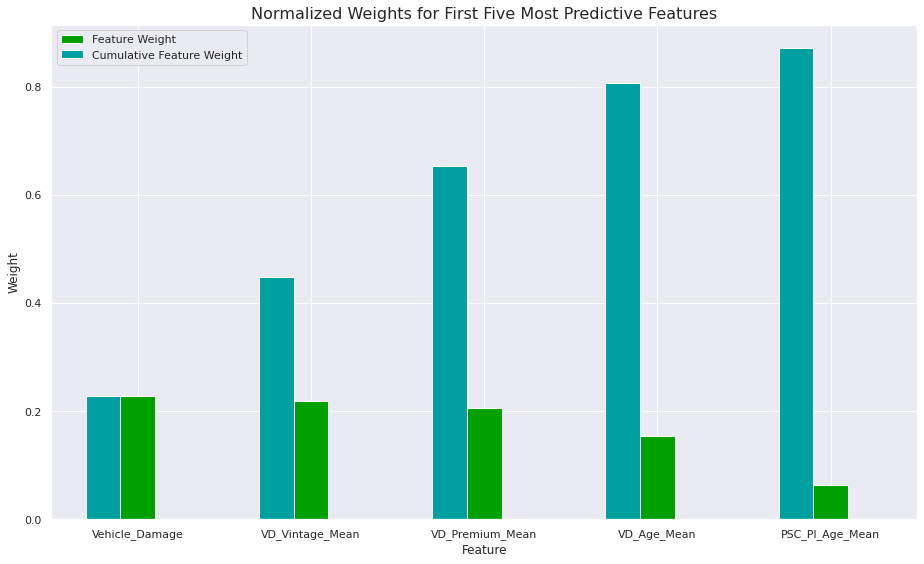

In [ ]:
# Creat the plot
fig = plt.figure(figsize = (13,8))
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', label = "Feature Weight")
plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', label = "Cumulative Feature Weight")
plt.xticks(np.arange(5), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize = 12)
plt.xlabel("Feature", fontsize = 12) 
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show();

There is very little we can use to differentiate the Random Forest model and the Gradient Boosting model. Both score the same for almost all the metrics. The distribution of the feature importance is also evenly for the Gradient Boosting model.

### ML Model - 5 - **Implementing XGBoost Classifier Model**

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
XGBClassifier
--------------------------------------------------

Evaluation of XGBClassifier for training set before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.82       0.75    0.95      0.84           0.82      6.55



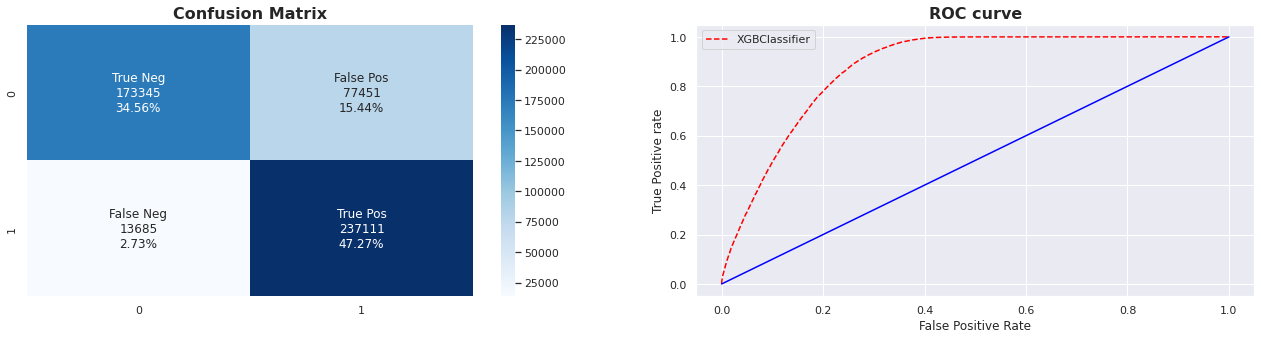


Evaluation of XGBClassifier for test set before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.71       0.29    0.91      0.44           0.80     10.42



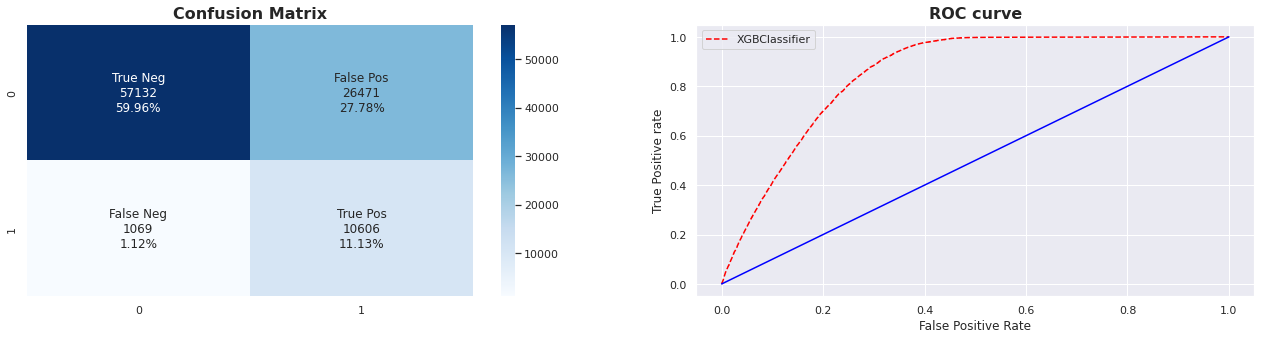

**************************************************
Best Score for XGBClassifier : 0.8436761156056256 
---
Best Parameters for XGBClassifier : {'subsample': 0.9, 'reg_alpha': 0.005, 'random_state': 23, 'min_child_weight': 4, 'max_depth': 4, 'gamma': 0.1}
--------------------------------------------------
Elapsed Time: 00:19:04

Evaluation of XGBClassifier for train set after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.81       0.74    0.94      0.83           0.81      6.98



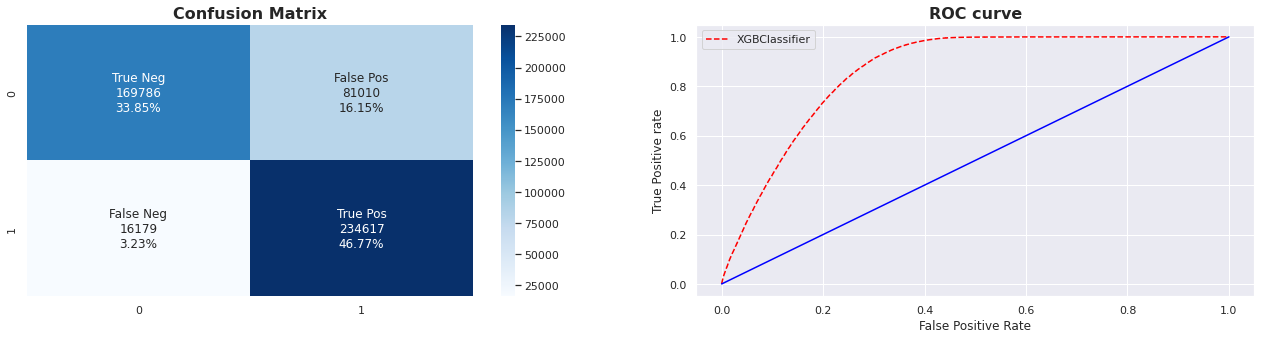


Evaluation of XGBClassifier for test set after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.70       0.28    0.93      0.43           0.80     10.65



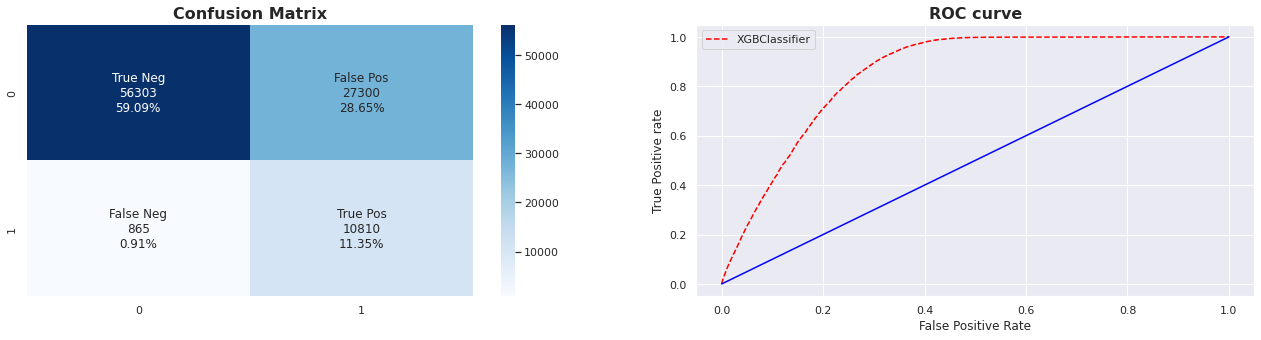

In [ ]:
parameters_xgboost = {'max_depth': [4,5,6,7,8],
                      'min_child_weight': [3,4,5,6],
                      'gamma': [0.05,0.1,0.15,0.2,],
                      'reg_alpha': [0.001,0.003,0.005,0.007,0.009],
                      'subsample': [0.5,0.6,0.7,0.8,0.9],
                      "random_state":[23]}

xg_metrics = ml_algorithm_implementation(X_res, y_res, X_test, y_test, XGBClassifier(), parameters_xgboost, Tuning_Method) 

In [ ]:
xg_metrics

Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss  \
0            0.81       0.74    0.94      0.83           0.81      6.98   
1            0.70       0.28    0.93      0.43           0.80     10.65   

                 Model  
0  XGBClassifier train  
1   XGBClassifier test

In [ ]:
xgmodel = XGBClassifier(subsample = 0.8, reg_alpha = 0.001, random_state = 23, min_child_weight = 3, max_depth = 4, gamma = 0.1)
xgmodel.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=23, ...)

In [ ]:
y_pred = xgmodel.predict(X_test)

In [ ]:
# Feature Importance
feat_dict= {}
for col, val in sorted(zip(X_train.columns, xgmodel.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
values = feat_df['Importance'][:5]
columns = feat_df['Feature'][:5]

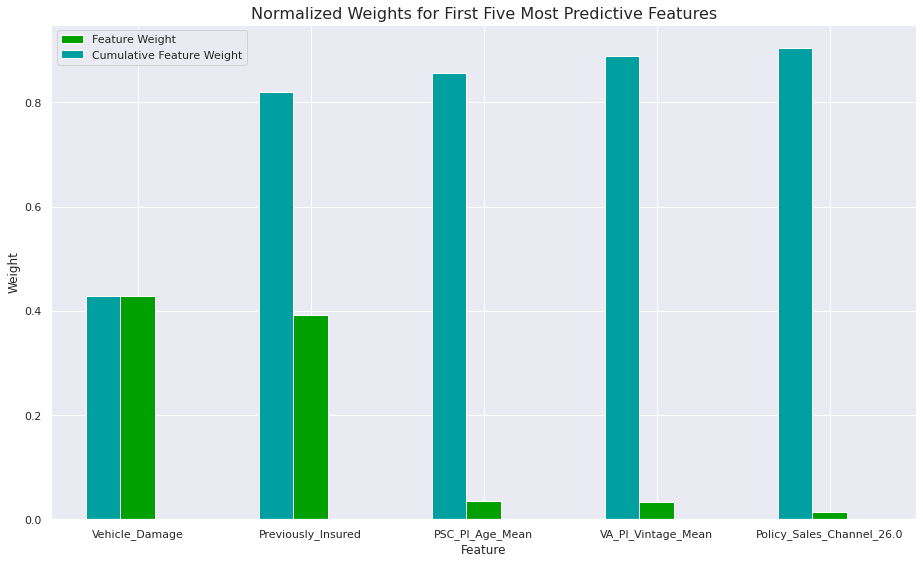

In [ ]:
# Creat the plot
fig = plt.figure(figsize = (13,8))
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', label = "Feature Weight")
plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', label = "Cumulative Feature Weight")
plt.xticks(np.arange(5), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize = 12)
plt.xlabel("Feature", fontsize = 12) 
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show();

We have so far attained the best ROC AUC scores for all but the Decision Tree model. And so we have to focus more on how the precision and recall goes on to have a say on the final model to be chosen.

And in the case of the XGB Classifier, we have been left wanting in the recall aspect of the model.

### ML Model - 6 - **Stacking Classifier Model**

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_leaf=10,
                                                       min_samples_split=55,
                                                       n_estimators=55,
                                                       random_state=23)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.001,
                                                           max_depth=5,
                                                           min_samples_leaf=15,
                                                           min_samples_split=60,
                                                           random_state=23,
                                                           subsample=0.5)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=4,
                                              max_leaves=None,
                                              min_child_weight=4, missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=23, ...)),
                               ('lg',
                                LogisticRegression(C=0.01, l1_ratio=0.2,
                                                   penalty=None,
                                                   random_state=23))],
                   final_estimator=LogisticRegression())


Evaluation of Stacking Classifier for train set:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.81       0.75    0.91      0.82           0.81      7.00



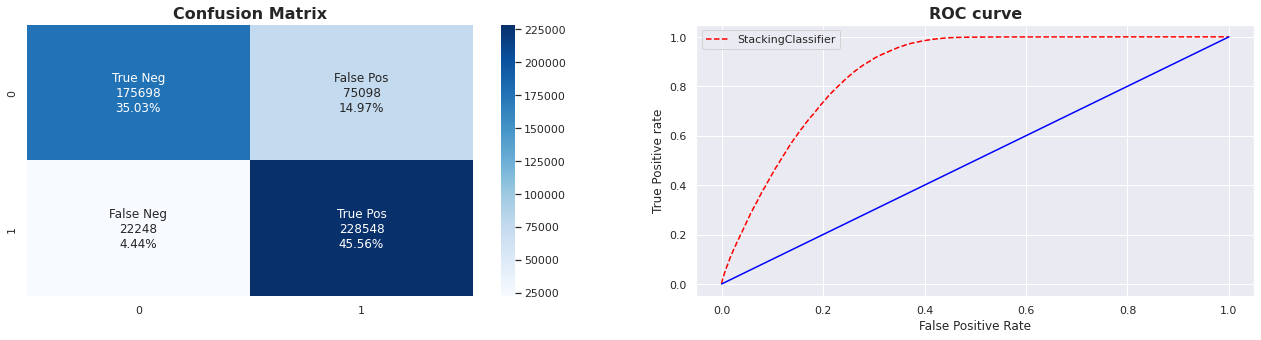


Evaluation of StackingClassifier for test set:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.72       0.29    0.90      0.44           0.80     10.03



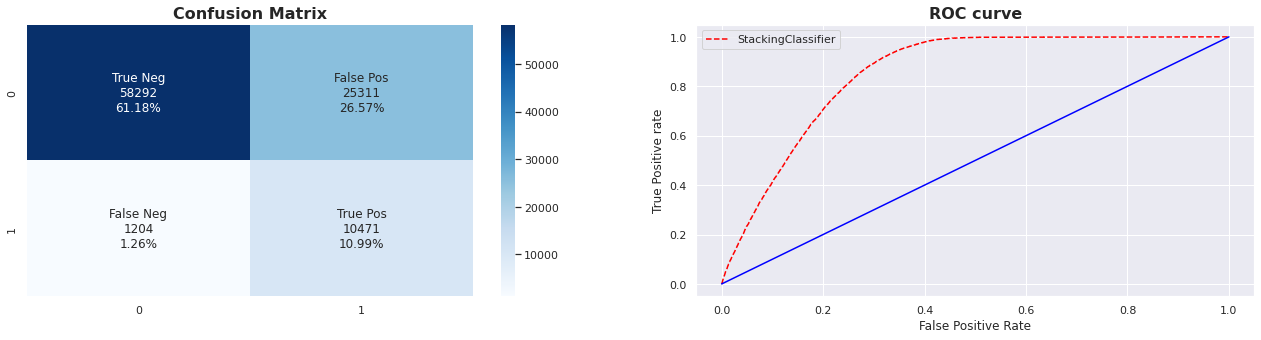

In [ ]:
# Stacking Classifier Model
# Random Forest Classifier + Gradient Boosting Classifier + XGBoost Classifier + Logistic Regression -> Logistic Regression
estimators = [('rf', RandomForestClassifier(random_state=23, n_estimators=55, min_samples_split=55, min_samples_leaf=10, max_depth=6)),
              ('gb', GradientBoostingClassifier(subsample=0.5, random_state=23, min_samples_split=60, min_samples_leaf=15, max_depth=5, learning_rate=0.001)),
              ('xgb', XGBClassifier(subsample=0.8, reg_alpha=0.005, random_state=23, min_child_weight=4, max_depth=4, gamma=0.05)),
              ('lg', LogisticRegression(random_state = 23, penalty = None, l1_ratio = 0.2, C = 0.01))]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_res, y_res)

train = clf.predict(X_res)
y_pred = clf.predict(X_test)

# Evaluation Metrics for train set 
print(f'\nEvaluation of Stacking Classifier for train set:\n'+'-----'*10)
train_metrics_df = evaluation_metrics(type(clf).__name__,len(list(X_res.columns)), train, y_res)
train_metrics_df['Model'] = type(clf).__name__+' train'

print()
plot_confusion_matrix_and_roc_curves(clf, X_res, y_res, train)

# Evaluation Metrics for test set
print(f'\nEvaluation of {type(clf).__name__} for test set:\n'+'-----'*10)
test_metrics_df = evaluation_metrics(type(clf).__name__,len(list(X_res.columns)), y_pred, y_test)
test_metrics_df['Model'] = type(clf).__name__+' test'

print()
plot_confusion_matrix_and_roc_curves(clf, X_test, y_test, y_pred)

In [ ]:
# Stacking Classifier Model
metrics_df = pd.concat([train_metrics_df, test_metrics_df], ignore_index = True)

In [ ]:
metrics_df

Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss  \
0            0.81       0.75    0.91      0.82           0.81      7.00   
1            0.72       0.29    0.90      0.44           0.80     10.03   

                      Model  
0  StackingClassifier train  
1   StackingClassifier test

Stacking Classifier has the highest precision value but the difference isn't too much. And that small difference comes at the cost of the recall score going 4 percent lower. 

### Final Model

In [129]:
model_performances = pd.concat([log_metrics, dt_metrics, rf_metrics, gb_metrics, xg_metrics, metrics_df], ignore_index = True)
model_performances

Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss  \
0             0.80       0.73    0.94      0.82           0.80      7.32   
1             0.69       0.27    0.94      0.42           0.80     11.30   
2             0.78       0.73    0.89      0.80           0.78      7.87   
3             0.70       0.28    0.89      0.42           0.78     10.81   
4             0.80       0.73    0.93      0.82           0.80      7.28   
5             0.69       0.28    0.93      0.43           0.80     11.05   
6             0.80       0.73    0.94      0.82           0.80      7.30   
7             0.69       0.28    0.94      0.43           0.80     11.14   
8             0.81       0.74    0.94      0.83           0.81      6.98   
9             0.70       0.28    0.93      0.43           0.80     10.65   
10            0.81       0.75    0.91      0.82           0.81      7.00   
11            0.72       0.29    0.90      0.44           0.80     10.03   

                               Model  
0           LogisticRegression train  
1            LogisticRegression test  
2       DecisionTreeClassifier train  
3        DecisionTreeClassifier test  
4       RandomForestClassifier train  
5        RandomForestClassifier test  
6   GradientBoostingClassifier train  
7    GradientBoostingClassifier test  
8                XGBClassifier train  
9                 XGBClassifier test  
10          StackingClassifier train  
11           StackingClassifier test

We have decided to go ahead with the Gradient Boosting Model as it gives us the tied-best ROC AUC score, highest recall and second-best precision value. And it also makes the use of a lot of the newly created features of ours and distributes the importance of the features more evenly throughout the dataset.


### Model Explanability

In [128]:
# Final Model
gbmodel = GradientBoostingClassifier(subsample = 0.5, random_state = 23, min_samples_split = 60, min_samples_leaf = 20, max_depth = 7, learning_rate = 0.005)
gbmodel.fit(X_res, y_res)
y_pred = gbmodel.predict(X_test)

GradientBoostingClassifier(learning_rate=0.005, max_depth=7,
                           min_samples_leaf=20, min_samples_split=60,
                           random_state=23, subsample=0.5)

In [131]:
# Using shaply for model explanability
idx = 100 # row selected for fast runtime
select = range(idx)
features = X_test.iloc[select]
feature_display = X.loc[features.index]
shap_values = shap.TreeExplainer(gbmodel).shap_values(features)

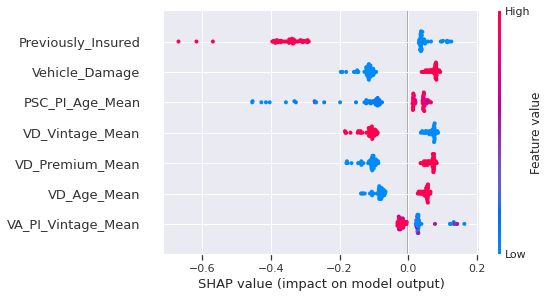

In [132]:
shap.summary_plot(shap_values, features, max_display=7)

These are the 7 features that have the most say in our final model. The higher the feature appears, the more its importance.

The violin plots shows how the lower (blue) and higher (red) values for the features are distributed with respect to the shap values. The more it is towards left, the higher chance of model saying the customer won't buy and the more it is on right, the higher chance of model saying the customer will buy.

In [130]:
# Using LIME for model explanability
class_names = [0, 1]
#instantiate the explanations for the data set
limeexplainer = LimeTabularExplainer(X_test.values, class_names=class_names, feature_names=X_test.columns)
idx=841 # the rows of the dataset
explainable_exp = limeexplainer.explain_instance(X_test.values[idx], gbmodel.predict_proba, num_features=5)
explainable_exp.show_in_notebook(show_table=True, show_all=False)

For the given particular datapoint, the probability of the customer buying is high (62%). And four of the five most impacting features push us towards the idea that the customer will buy. 

Those four are Previously_Insured, VD_Vintage_Mean (Mean of Vintage for Vehicle_Damage groupby data), PSC_PI_Age_Mean (Mean of Age for the Policy_Sales_Channel and Previously_Insured groupby data) and Age.

Whereas, the feature VA_PI_Vintage_Mean (Mean for Vintage for the Vehicle_Age and Previously_Insured groupby data).

# **Conclusion**


Getting the sales done is not easy regardless of how much information one can get of the customer. And so, the distribution of sales closed and not closed would be very skewed in nature.

Only 12.26% of the sales were closed by the team.

From the data that we have of our health insurance customers, we understand that 54.18% of them do not have any record of vehicle insurance in the previous years. This certainly is a big market to try and penetrate and so campaigns that helps a user understand the benefits of having a vehicle insurance must be created.

Our health insurance customers' dataset has 54.08% males and 45.92% females. We have not been as popular amongst our female health insurance customers when it comes to swaying them into buying our vehicle insurances as well as we would have liked to. Only 38.93% females have converted and 61.07% males have converted of the ones who converted. 

The middle-aged customers showed more interest in our vehicle insurance.

Almost everyone targeted holds a vehicle insurance, as expected. Only 0.21% of the customers targeted don't have a driving license.

Region with code 28 has the most customers and perhaps the highest percentage of success in terms of cross selling. Overall a very small percentage of customers from the regions with most population buy our vehicle insurances.

Customers with vehicles of age between 1 and 2 years have showed the most interest in our insurance. 3/4th of the customers who responded yes belong to this category. 

Almost all of the customers who responded yes to buying our vehicle insurance have damaged vehicle. Only 2% don't.

The two types of customers (ones who responded yes and ones who responded no) seem to have similar distribution of their Annual Premium. The distribution is slightly higher for those who responded yes, but the difference is too little to seem significant for the 40-50 percentiles of the customers.

The distribution of the customer's age with the company is same for both the types - ones who bought the vehicle insurance and ones who didn't.

# **Scope for Improvements**


We have a very low precision score and that is even though a caveat we have to live with while working with a very highly unbalanced data like ours, we would like to improve it as much as possible given we don't pull down our recall values.

We may have done better with the feature engineering process, even though we believe most of our features have been important in our final model.

And lastly, we believe that a more advanced model like CatBoostClassifier or a Deep Neural Network Classifier could have done a better job.